In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import math
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
file_path = 'Mobiles Dataset (2025).csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

Model Name Company Name  Mobile Weight(in g)  RAM(in GB)  \
0       iPhone 16 128GB        Apple                174.0         6.0   
1       iPhone 16 256GB        Apple                174.0         6.0   
2       iPhone 16 512GB        Apple                174.0         6.0   
3  iPhone 16 Plus 128GB        Apple                203.0         6.0   
4  iPhone 16 Plus 256GB        Apple                203.0         6.0   

  Front Camera Back Camera   Processor  Battery Capacity(in mAh)  \
0         12MP        48MP  A17 Bionic                    3600.0   
1         12MP        48MP  A17 Bionic                    3600.0   
2         12MP        48MP  A17 Bionic                    3600.0   
3         12MP        48MP  A17 Bionic                    4200.0   
4         12MP        48MP  A17 Bionic                    4200.0   

  Screen Size(in inches)  Launched Price (India)(in INR)  \
0                    6.1                         79999.0   
1                    6.1                         84999.0   
2                    6.1                         89999.0   
3                    6.7                         89999.0   
4                    6.7                         94999.0   

   Launched Price (USA)(in USD)  Launched Year  
0                         799.0           2024  
1                         849.0           2024  
2                         899.0           2024  
3                         899.0           2024  
4                         949.0           2024

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Model Name                      930 non-null    object 
 1   Company Name                    930 non-null    object 
 2   Mobile Weight(in g)             930 non-null    float64
 3   RAM(in GB)                      930 non-null    float64
 4   Front Camera                    930 non-null    object 
 5   Back Camera                     930 non-null    object 
 6   Processor                       930 non-null    object 
 7   Battery Capacity(in mAh)        930 non-null    float64
 8   Screen Size(in inches)          930 non-null    object 
 9   Launched Price (India)(in INR)  930 non-null    float64
 10  Launched Price (USA)(in USD)    930 non-null    float64
 11  Launched Year                   930 non-null    int64  
dtypes: float64(5), int64(1), object(6)
m

# For missing values

In [5]:
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


Model Name                        0
Company Name                      0
Mobile Weight(in g)               0
RAM(in GB)                        0
Front Camera                      0
Back Camera                       0
Processor                         0
Battery Capacity(in mAh)          0
Screen Size(in inches)            0
Launched Price (India)(in INR)    0
Launched Price (USA)(in USD)      0
Launched Year                     0
dtype: int64

All the missing values are 0, so they are already managed

# For duplicated values:

In [6]:
df.shape

(930, 12)

In [7]:
df.duplicated().sum()

np.int64(15)

15 duplicated values are there, which are dropped

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(915, 12)

In [10]:
df.duplicated().sum()

np.int64(0)

# For Removing Outliers:

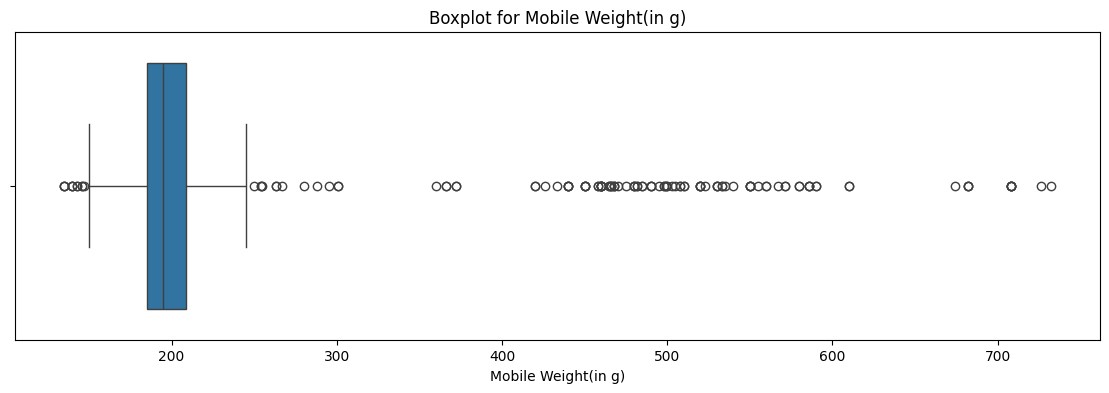

For column 'Mobile Weight(in g)': (skewness: 2.73), so by using IQR method:
  Lower Bound: 149.0, Upper Bound: 245.0


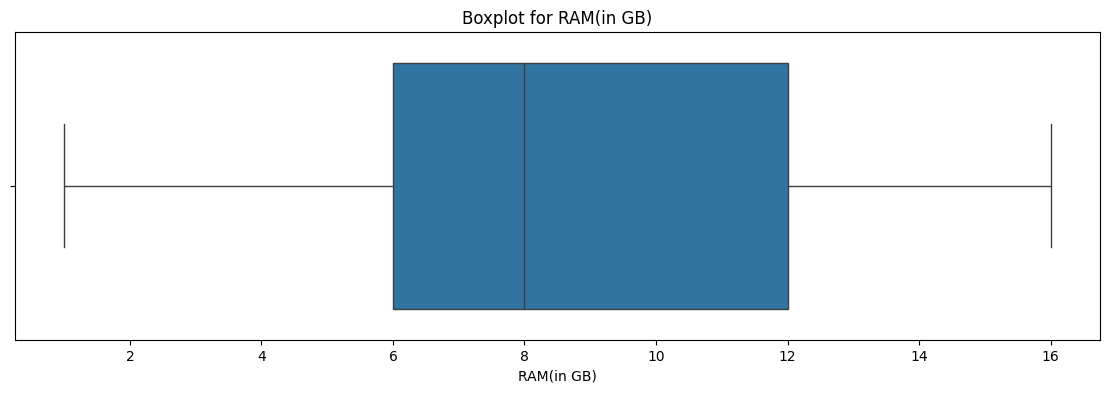

For column 'RAM(in GB)': (skewness: 0.55), so by using Z-score method (threshold < 3).


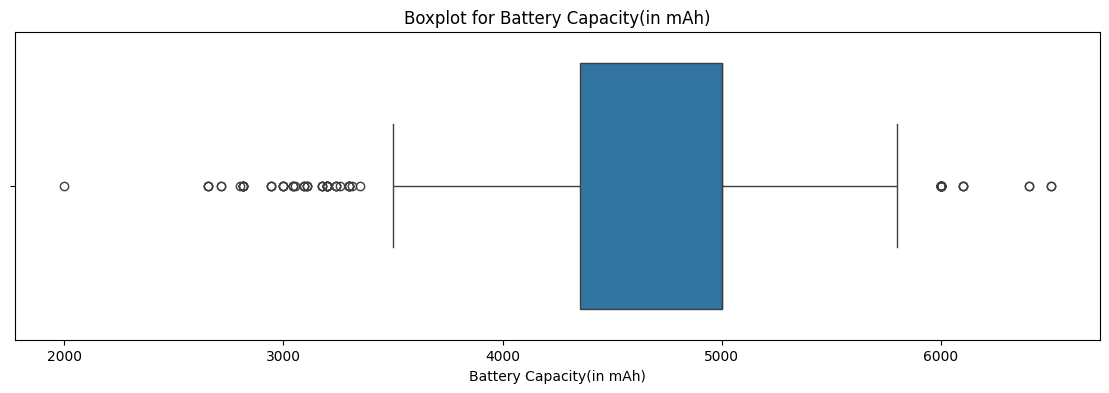

For column 'Battery Capacity(in mAh)': (skewness: -0.67), so by using Z-score method (threshold < 3).


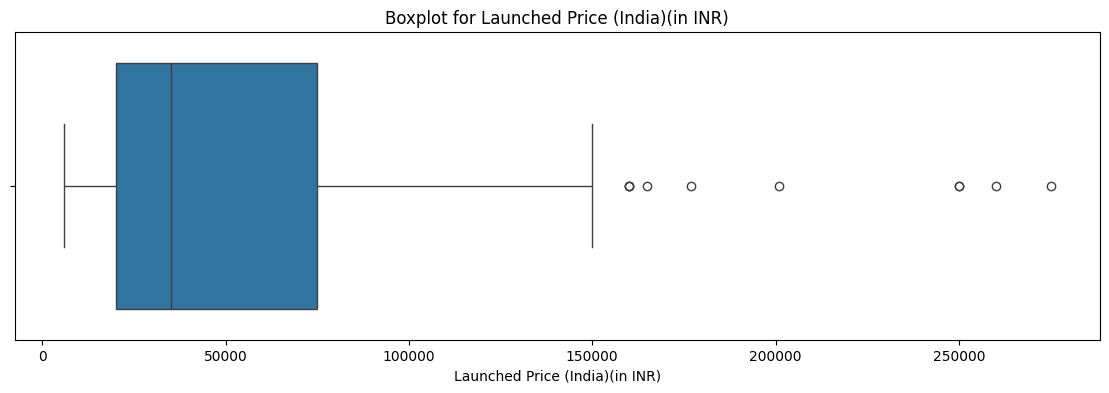

For column 'Launched Price (India)(in INR)': (skewness: 1.55), so by using IQR method:
  Lower Bound: -62501.0, Upper Bound: 157499.0


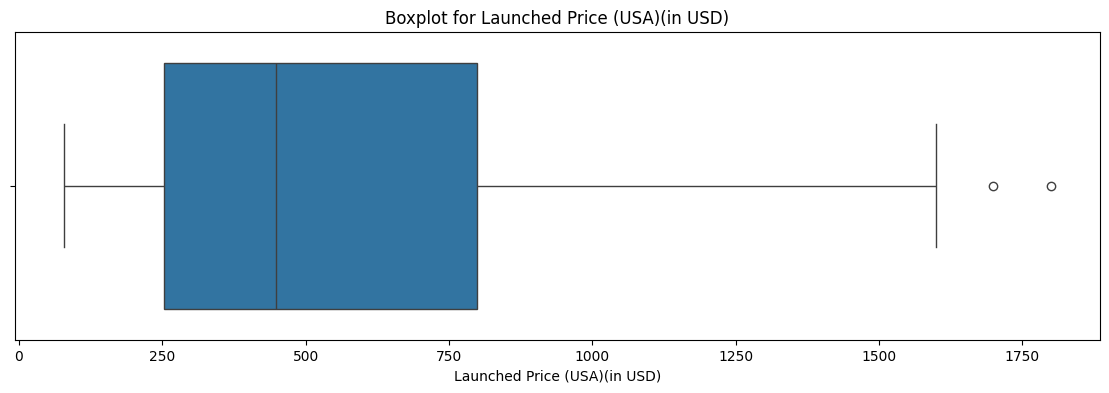

For column 'Launched Price (USA)(in USD)': (skewness: 0.82), so by using Z-score method (threshold < 3).


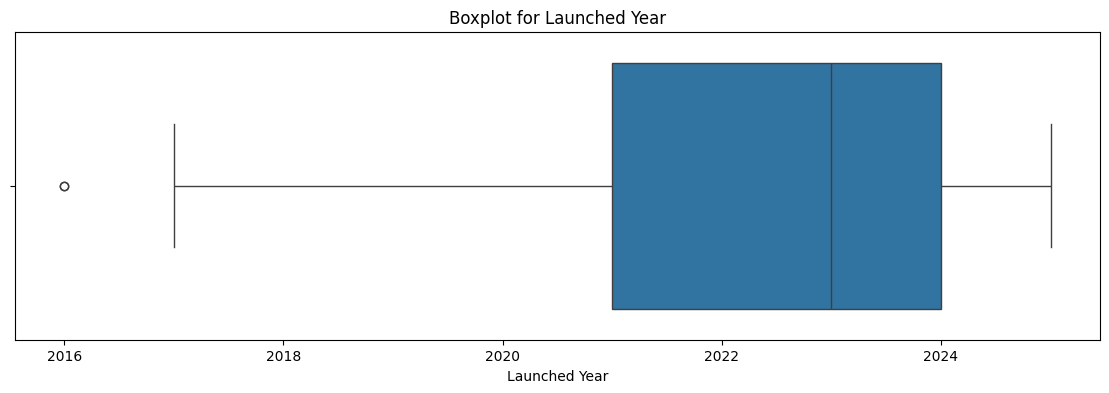

For column 'Launched Year': (skewness: -0.83), so by using Z-score method (threshold < 3).


In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    skewness = df[col].skew()
    
    # boxplot
    plt.figure(figsize=(14, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()
    
    # If the data is highly skewed, use IQR; else use Z-score method
    if abs(skewness) > 1:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        print(f"For column '{col}': (skewness: {skewness:.2f}), so by using IQR method:")
        print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    else:
        z_scores = np.abs(stats.zscore(df[col]))
        print(f"For column '{col}': (skewness: {skewness:.2f}), so by using Z-score method (threshold < 3).")
        df = df[(z_scores < 3)]


In [12]:
print(f"After outlier treatment for '{col}', dataset shape is: {df.shape}")

After outlier treatment for 'Launched Year', dataset shape is: (778, 12)


In [13]:
df.shape

(778, 12)

# For standardizing categorical values:

In [14]:
for col in ['Front Camera', 'Back Camera']:
    if col in df.columns:
        df[col] = df[col].str.upper().str.strip()

for col in ['Model Name', 'Company Name', 'Processor']:
    if col in df.columns:
        df[col] = df[col].str.title().str.strip()


Model Name is dropped as it doesn't contribute to calculations

In [15]:
df.drop(columns=["Model Name"], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 924
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Company Name                    778 non-null    object 
 1   Mobile Weight(in g)             778 non-null    float64
 2   RAM(in GB)                      778 non-null    float64
 3   Front Camera                    778 non-null    object 
 4   Back Camera                     778 non-null    object 
 5   Processor                       778 non-null    object 
 6   Battery Capacity(in mAh)        778 non-null    float64
 7   Screen Size(in inches)          778 non-null    object 
 8   Launched Price (India)(in INR)  778 non-null    float64
 9   Launched Price (USA)(in USD)    778 non-null    float64
 10  Launched Year                   778 non-null    int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 72.9+ KB


In [17]:
df.head()

Company Name  Mobile Weight(in g)  RAM(in GB) Front Camera Back Camera  \
0        Apple                174.0         6.0         12MP        48MP   
1        Apple                174.0         6.0         12MP        48MP   
2        Apple                174.0         6.0         12MP        48MP   
3        Apple                203.0         6.0         12MP        48MP   
4        Apple                203.0         6.0         12MP        48MP   

    Processor  Battery Capacity(in mAh) Screen Size(in inches)  \
0  A17 Bionic                    3600.0                    6.1   
1  A17 Bionic                    3600.0                    6.1   
2  A17 Bionic                    3600.0                    6.1   
3  A17 Bionic                    4200.0                    6.7   
4  A17 Bionic                    4200.0                    6.7   

   Launched Price (India)(in INR)  Launched Price (USA)(in USD)  Launched Year  
0                         79999.0                         799.0           2024  
1                         84999.0                         849.0           2024  
2                         89999.0                         899.0           2024  
3                         89999.0                         899.0           2024  
4                         94999.0                         949.0           2024

In [18]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
['Mobile Weight(in g)', 'RAM(in GB)', 'Battery Capacity(in mAh)', 'Launched Price (India)(in INR)', 'Launched Price (USA)(in USD)', 'Launched Year']


In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
['Company Name', 'Front Camera', 'Back Camera', 'Processor', 'Screen Size(in inches)']


# **2.Univariate Analysis**

Numerical Columns:

In [20]:
stats = df[numerical_columns].describe().T
stats["mode"] = df[numerical_columns].mode().T[0]
stats["skewness"] = df[numerical_columns].skew()
stats["variance"] = df[numerical_columns].var()
stats.T

Mobile Weight(in g)  RAM(in GB)  Battery Capacity(in mAh)  \
count              778.000000  778.000000                778.000000   
mean               192.907969    7.885604               4695.807198   
std                 15.740174    3.132595                675.023644   
min                150.000000    2.000000               2658.000000   
25%                184.000000    6.000000               4352.000000   
50%                191.000000    8.000000               5000.000000   
75%                202.000000    8.000000               5000.000000   
max                242.000000   16.000000               6500.000000   
mode               190.000000    8.000000               5000.000000   
skewness             0.401820    0.604049                 -0.612428   
variance           247.753064    9.813152             455656.920308   

          Launched Price (India)(in INR)  Launched Price (USA)(in USD)  \
count                       7.780000e+02                    778.000000   
mean                        4.760375e+04                    556.522699   
std                         3.512572e+04                    357.031680   
min                         5.999000e+03                     79.000000   
25%                         1.999900e+04                    252.250000   
50%                         3.499900e+04                    449.000000   
75%                         6.999900e+04                    799.000000   
max                         1.499990e+05                   1599.000000   
mode                        2.999900e+04                   1099.000000   
skewness                    9.903487e-01                      0.779775   
variance                    1.233816e+09                 127471.620363   

          Launched Year  
count        778.000000  
mean        2022.236504  
std            1.806781  
min         2017.000000  
25%         2021.000000  
50%         2023.000000  
75%         2024.000000  
max         2025.000000  
mode        2024.000000  
skewness      -0.791487  
variance       3.264457


Column: Mobile Weight(in g)
Mean: 192.90796915167098
Median: 191.0
Mode: 190.0
Variance: 247.75306382401496
Skewness: 0.40182010135404395


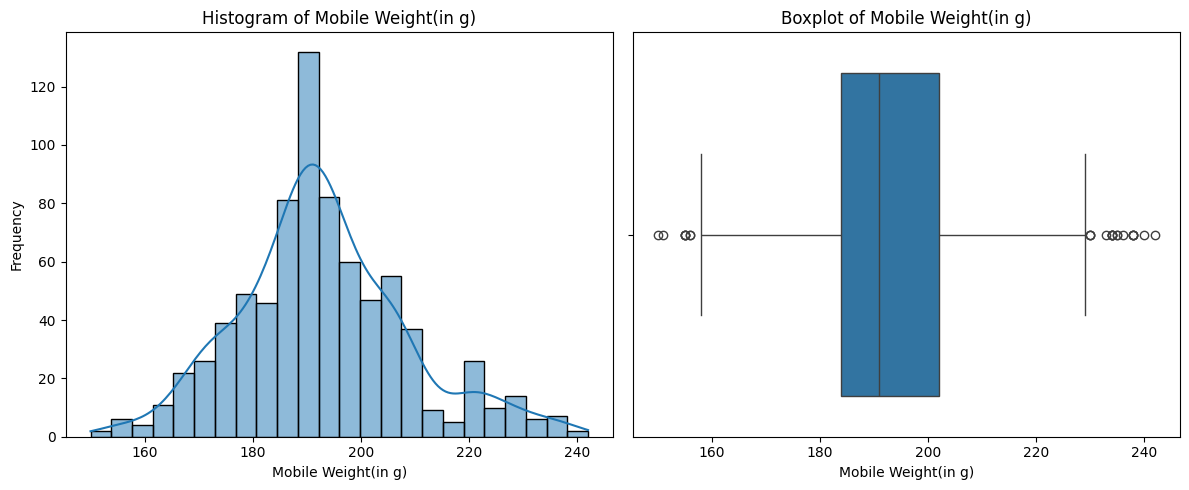


Column: RAM(in GB)
Mean: 7.885604113110539
Median: 8.0
Mode: 8.0
Variance: 9.813151565079586
Skewness: 0.6040491896701


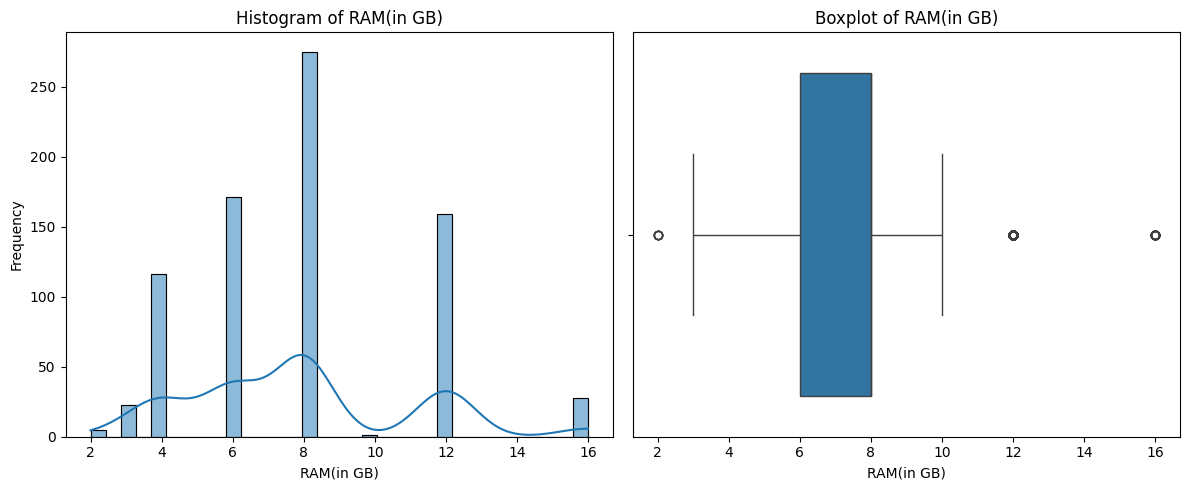


Column: Battery Capacity(in mAh)
Mean: 4695.807197943444
Median: 5000.0
Mode: 5000.0
Variance: 455656.92030848324
Skewness: -0.6124276365023362


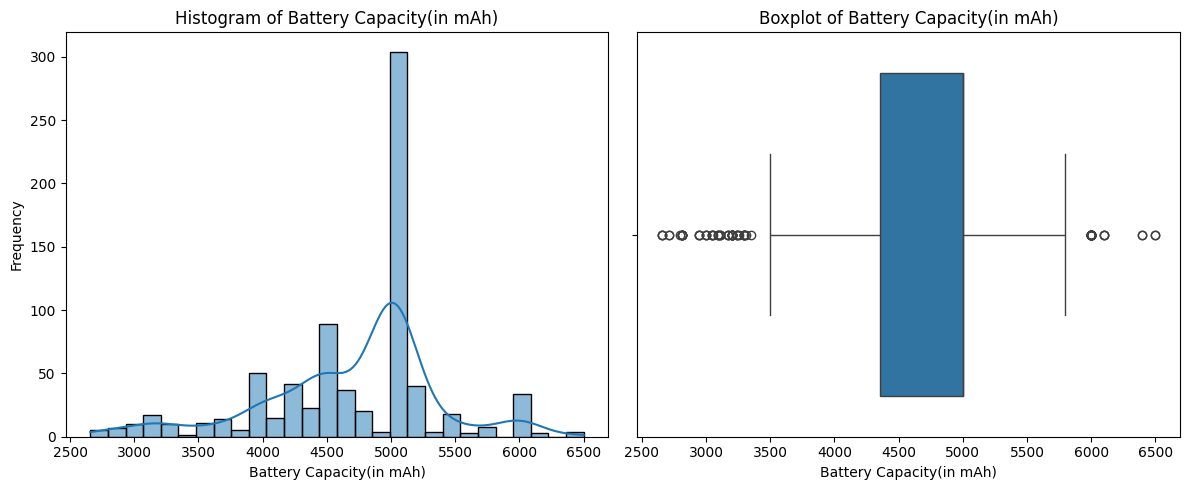


Column: Launched Price (India)(in INR)
Mean: 47603.75064267352
Median: 34999.0
Mode: 29999.0
Variance: 1233816092.8952699
Skewness: 0.9903487192830164


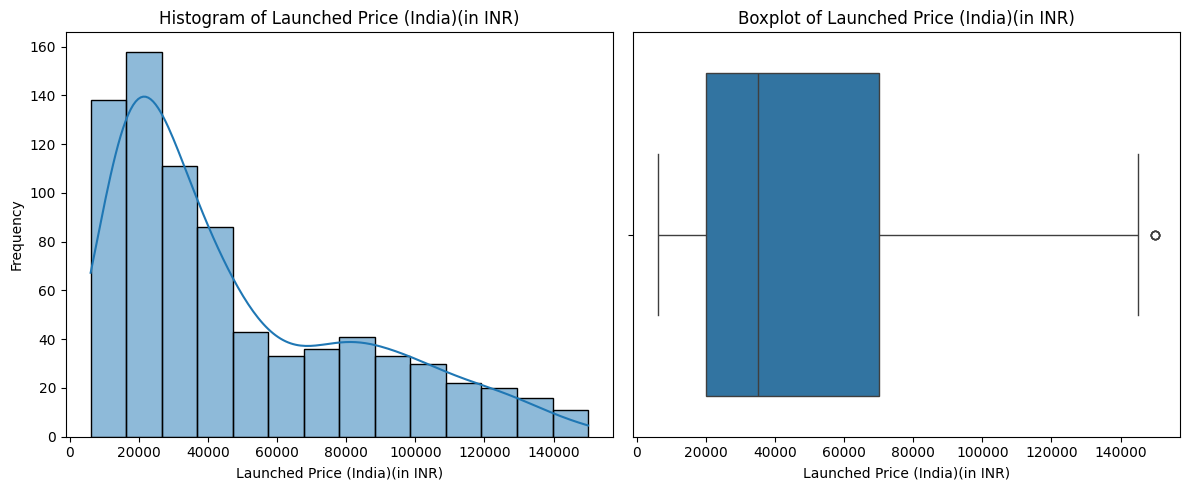


Column: Launched Price (USA)(in USD)
Mean: 556.5226992287918
Median: 449.0
Mode: 1099.0
Variance: 127471.62036310376
Skewness: 0.7797745788980115


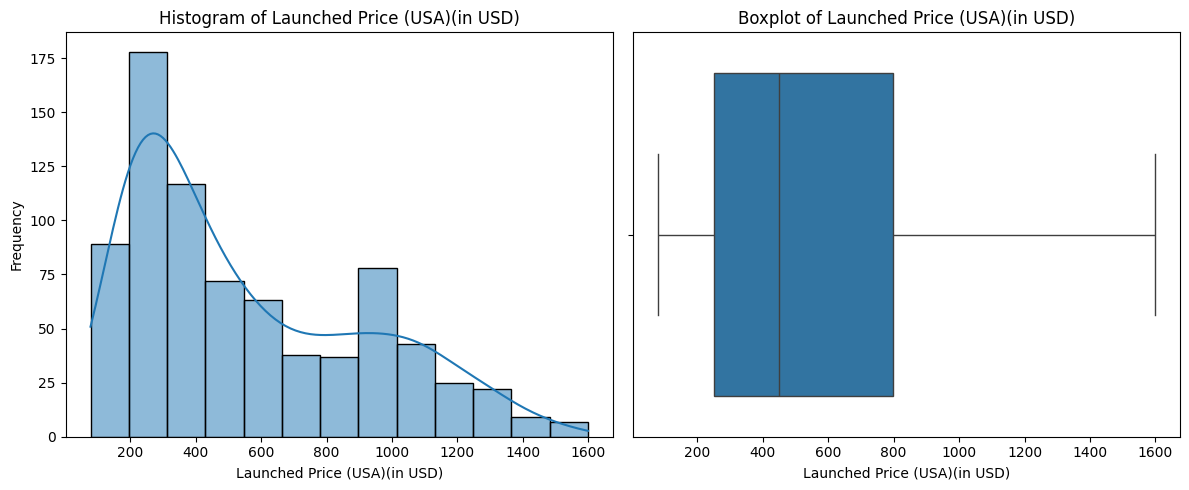


Column: Launched Year
Mean: 2022.236503856041
Median: 2023.0
Mode: 2024
Variance: 3.264457259315871
Skewness: -0.7914867889606474


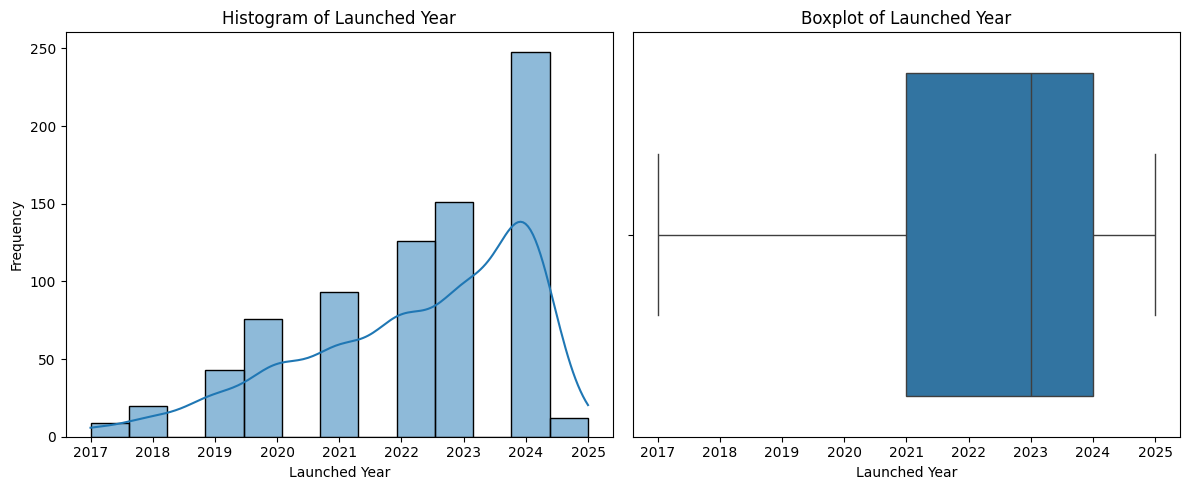

In [21]:
for col in numerical_columns:
    print(f"\nColumn: {col}")
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    var_val = df[col].var()
    skewness_val = df[col].skew()
    
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Variance: {var_val}")
    print(f"Skewness: {skewness_val}")
    
    # Visualizations for the numerical column
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


Categorical Columns:


Each has to be handled separately due to the different nature of each


Frequency Distribution for Company Name:
Company Name
Oppo        108
Vivo         76
Apple        74
Samsung      63
Motorola     62
Honor        62
Realme       55
Infinix      51
Oneplus      50
Tecno        36
Huawei       34
Poco         30
Xiaomi       27
Google       18
Lenovo       15
Nokia        10
Sony          7
Name: count, dtype: int64


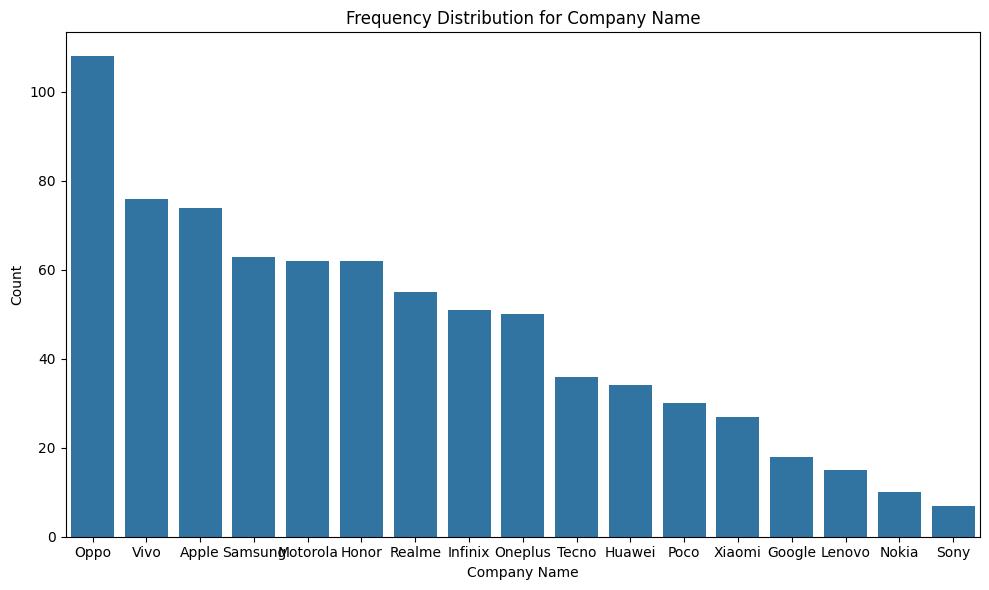

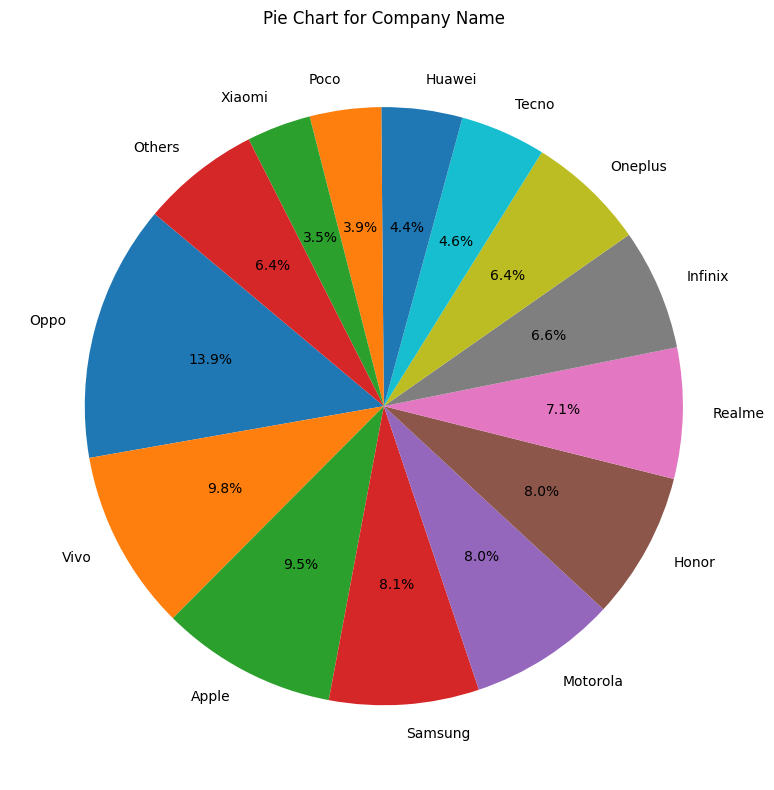

In [22]:
def combine_small_categories(freq, threshold_percent=2.5):
    total = freq.sum()
    mask = (freq / total * 100) < threshold_percent
    small_sum = freq[mask].sum()
    freq_new = freq[~mask].copy()
    if small_sum > 0:
        freq_new.loc['Others'] = small_sum
    return freq_new

if 'Company Name' in df.columns:
    company_freq = df['Company Name'].value_counts()
    print("\nFrequency Distribution for Company Name:")
    print(company_freq)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Company Name', data=df, order=company_freq.index)
    plt.title("Frequency Distribution for Company Name")
    plt.ylabel("Count")
    plt.xlabel("Company Name")
    plt.tight_layout()

    #pi-chart
    company_freq_combined = combine_small_categories(company_freq, threshold_percent=2.5)
    plt.figure(figsize=(8, 8))
    plt.pie(company_freq_combined.values, labels=company_freq_combined.index, autopct='%1.1f%%', startangle=140)
    plt.title("Pie Chart for Company Name")
    plt.tight_layout()
    plt.show()

Frequency Distribution for Screen Size(in inches):
Screen Size(in inches) Bin
(4.999, 5.25]      0
(5.25, 5.5]        6
(5.5, 5.75]        2
(5.75, 6.0]       14
(6.0, 6.25]       57
(6.25, 6.5]      164
(6.5, 6.75]      370
(6.75, 7.0]      154
(7.0, 7.25]        3
(7.25, 7.5]        0
(7.5, 7.75]        2
(7.75, 8.0]        1
Name: count, dtype: int64


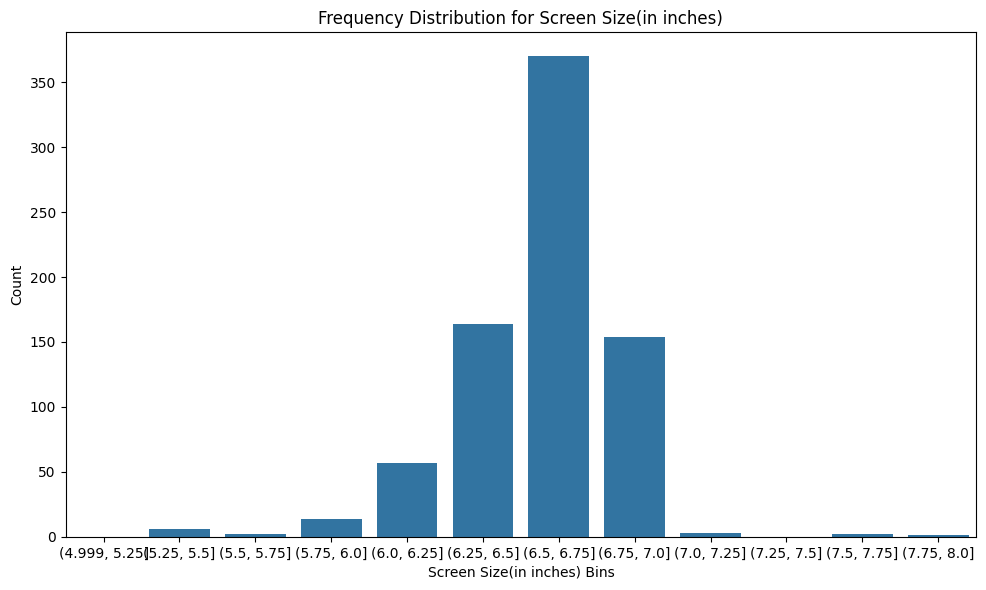

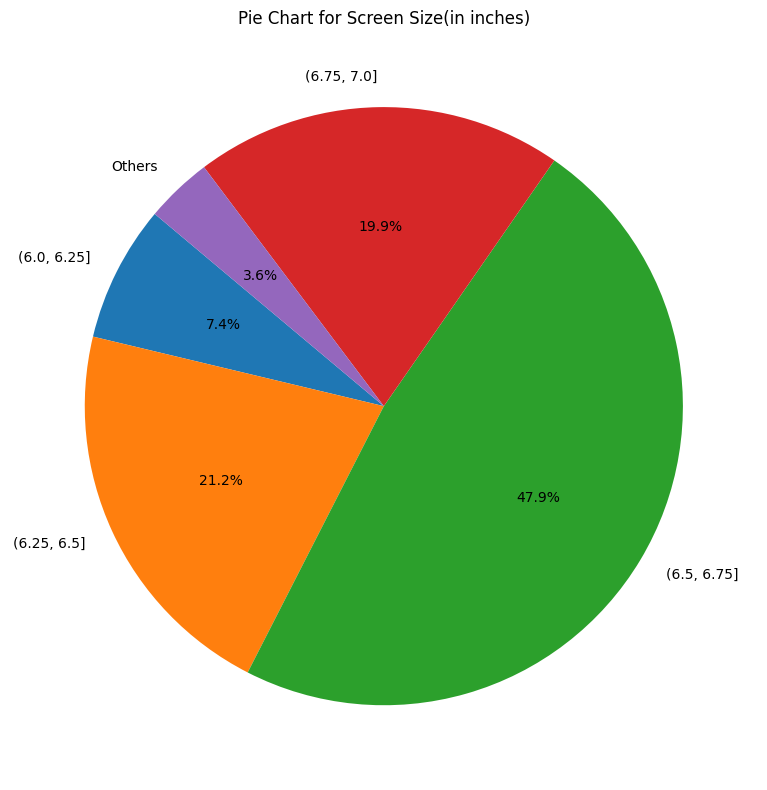

In [23]:
def combine_small_categories(freq, threshold_percent=2.5):
    total = freq.sum()
    mask = (freq / total * 100) < threshold_percent
    small_sum = freq[mask].sum()
    freq_new = freq[~mask].copy()
    if small_sum > 0:
        freq_new.loc['Others'] = small_sum
    return freq_new

df['Screen Size(in inches)'] = pd.to_numeric(df['Screen Size(in inches)'], errors='coerce')
min_size = df['Screen Size(in inches)'].min()
max_size = df['Screen Size(in inches)'].max()

bins = np.arange(5, max_size + 0.25, 0.25)
df['Screen Size(in inches) Bin'] = pd.cut(df['Screen Size(in inches)'], bins=bins, include_lowest=True)

screen_size_freq = df['Screen Size(in inches) Bin'].value_counts().sort_index()
print("Frequency Distribution for Screen Size(in inches):")
print(screen_size_freq)

plt.figure(figsize=(10, 6))
sns.countplot(x='Screen Size(in inches) Bin', data=df, order=screen_size_freq.index)
plt.title("Frequency Distribution for Screen Size(in inches)")
plt.ylabel("Count")
plt.xlabel("Screen Size(in inches) Bins")
plt.tight_layout()
plt.show()

#pi-chart
screen_size_freq_combined = combine_small_categories(screen_size_freq, threshold_percent=2.5)
plt.figure(figsize=(8, 8))
plt.pie(screen_size_freq_combined.values, labels=[str(x) for x in screen_size_freq_combined.index], autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart for Screen Size(in inches)")
plt.tight_layout()
plt.show()


Frequency Distribution for 'Front Camera' (Primary Megapixels):
Camera Processed
10     28
11      1
12     96
13     40
16    192
20     14
24      1
25      2
32    202
44      3
48      1
5      32
50     30
60     11
7      11
8     114
Name: count, dtype: int64


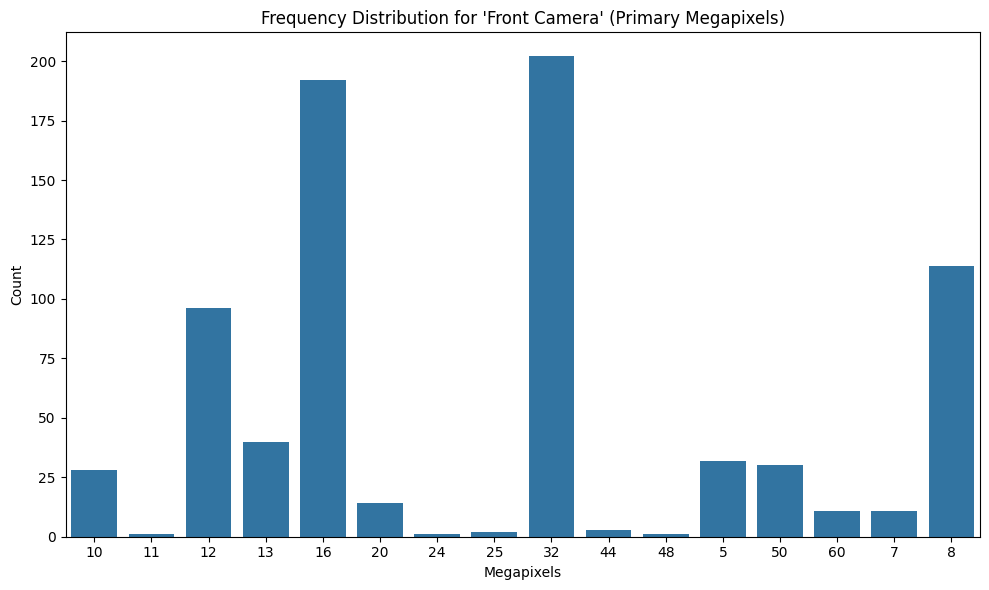

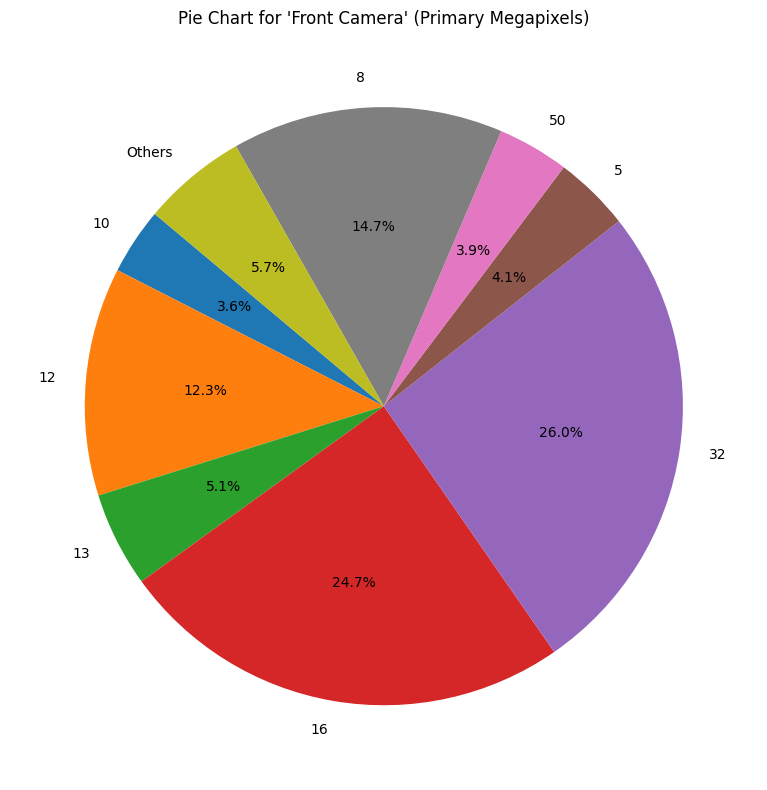


Frequency Distribution for 'Back Camera' (Primary Megapixels):
Camera Processed
100      2
108     53
12      65
13      56
16      19
160      2
20       3
200     13
40       4
48     104
50     338
54       3
64     106
8       10
Name: count, dtype: int64


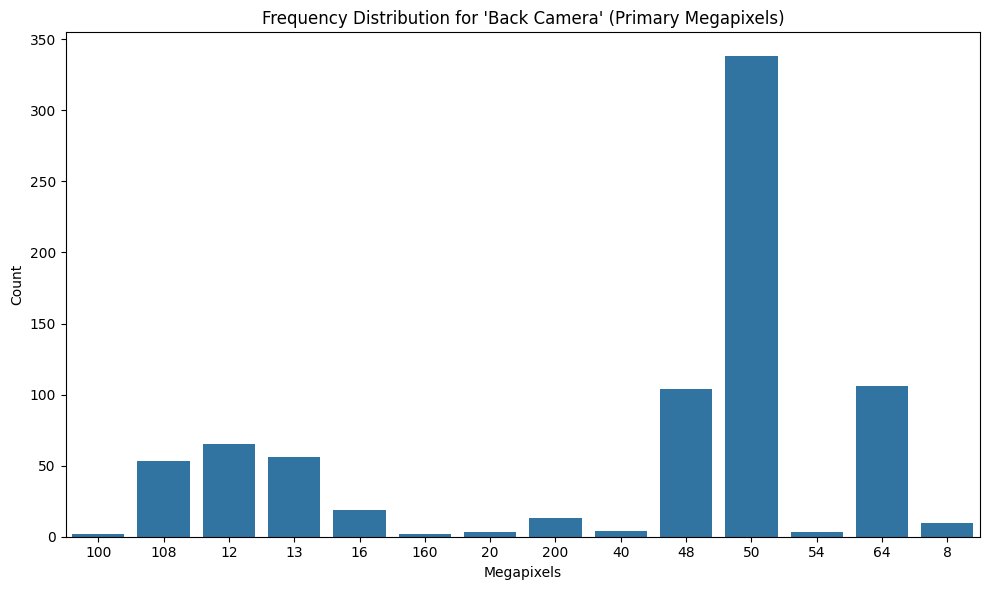

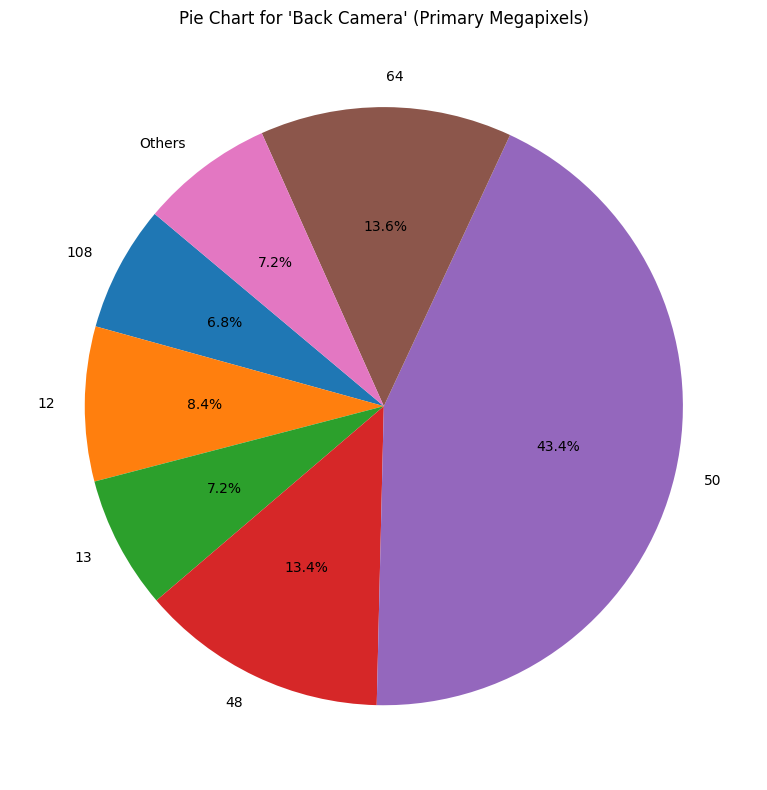

In [24]:
def combine_small_categories(freq, threshold_percent=2.5):
    total = freq.sum()
    mask = (freq / total * 100) < threshold_percent
    small_sum = freq[mask].sum()
    freq_new = freq[~mask].copy()
    if small_sum > 0:
        freq_new.loc['Others'] = small_sum
    return freq_new

for col in ['Front Camera', 'Back Camera']:
    df[col] = df[col].astype(str)
    df['Camera Processed'] = df[col].str.split('+').str[0]
    df['Camera Processed'] = df['Camera Processed'].str.extract(r'(\d+)', expand=False)
    
    camera_freq = df['Camera Processed'].value_counts().sort_index()
    print(f"\nFrequency Distribution for '{col}' (Primary Megapixels):")
    print(camera_freq)
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Camera Processed', data=df, order=camera_freq.index)
    plt.title(f"Frequency Distribution for '{col}' (Primary Megapixels)")
    plt.xlabel("Megapixels")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    camera_freq_combined = combine_small_categories(camera_freq, threshold_percent=2.5)
    plt.figure(figsize=(8, 8))
    plt.pie(camera_freq_combined.values, labels=camera_freq_combined.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Pie Chart for '{col}' (Primary Megapixels)")
    plt.tight_layout()
    plt.show()


Frequency Distribution for Processor (Standardized):
Processor Processed
Snapdragon     306
MediaTek       244
A Processor     74
Exynos          44
Dimensity       44
Unisoc          28
Kirin           25
Google          12
Helio            1
Name: count, dtype: int64


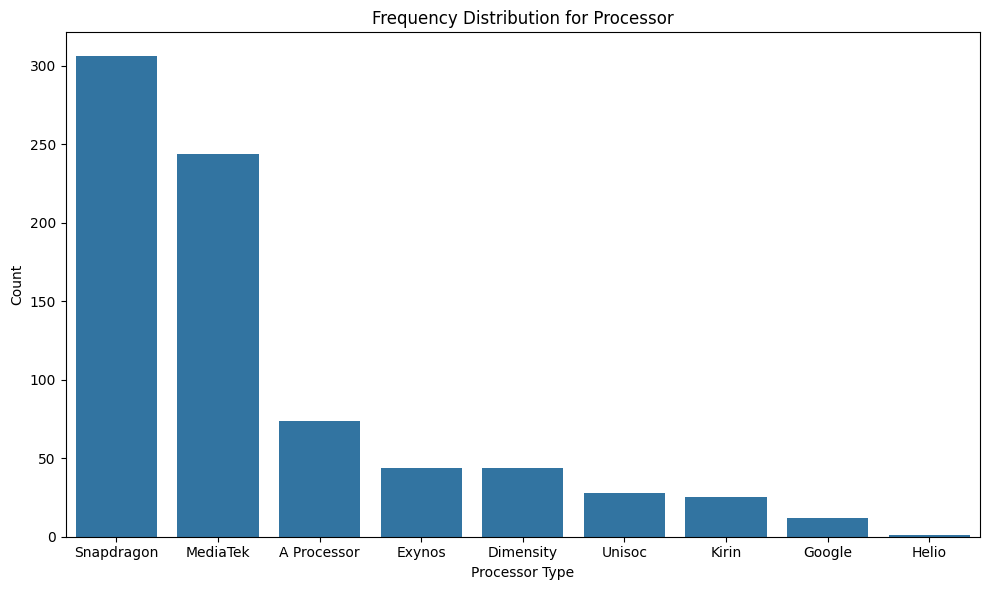

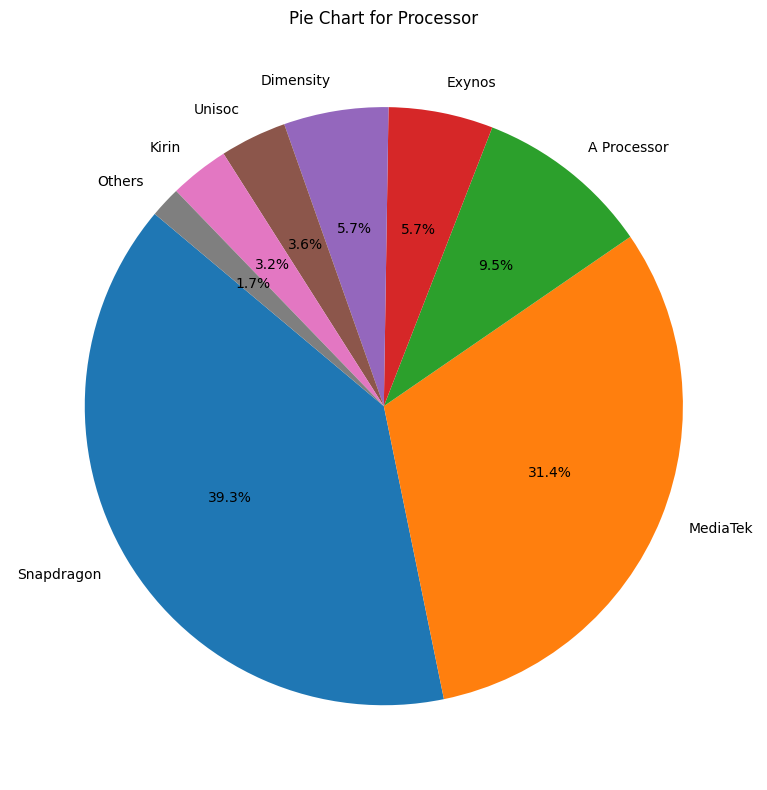

In [25]:
def combine_small_categories(freq, threshold_percent=2.5):
    total = freq.sum()
    mask = (freq / total * 100) < threshold_percent
    small_sum = freq[mask].sum()
    freq_new = freq[~mask].copy()
    if small_sum > 0:
        freq_new.loc['Others'] = small_sum
    return freq_new

def extract_processor_type(x):
    if pd.isna(x):
        return x
    x_str = str(x)
    x_lower = x_str.lower()
    if 'snapdragon' in x_lower:
        return 'Snapdragon'
    elif 'mediatek' in x_lower:
        return 'MediaTek'
    elif 'exynos' in x_lower:
        return 'Exynos'
    elif 'kirin' in x_lower:
        return 'Kirin'
    elif 'helio' in x_lower:
        return 'Helio'
    elif 'apple' in x_lower or x_lower.startswith('a'):
        return 'A Processor'
    else:
        return x_str.split()[0].title()


df['Processor Processed'] = df['Processor'].apply(extract_processor_type)
processor_freq = df['Processor Processed'].value_counts()
print("\nFrequency Distribution for Processor (Standardized):")
print(processor_freq)
plt.figure(figsize=(10, 6))
sns.countplot(x='Processor Processed', data=df, order=processor_freq.index)
plt.title("Frequency Distribution for Processor")
plt.ylabel("Count")
plt.xlabel("Processor Type")
plt.tight_layout()
plt.show()

processor_freq_combined = combine_small_categories(processor_freq, threshold_percent=2.5)
plt.figure(figsize=(8, 8))
plt.pie(processor_freq_combined.values, labels=processor_freq_combined.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart for Processor")
plt.tight_layout()
plt.show()


## Bivariate Analysis

Numerical V/S Numerical

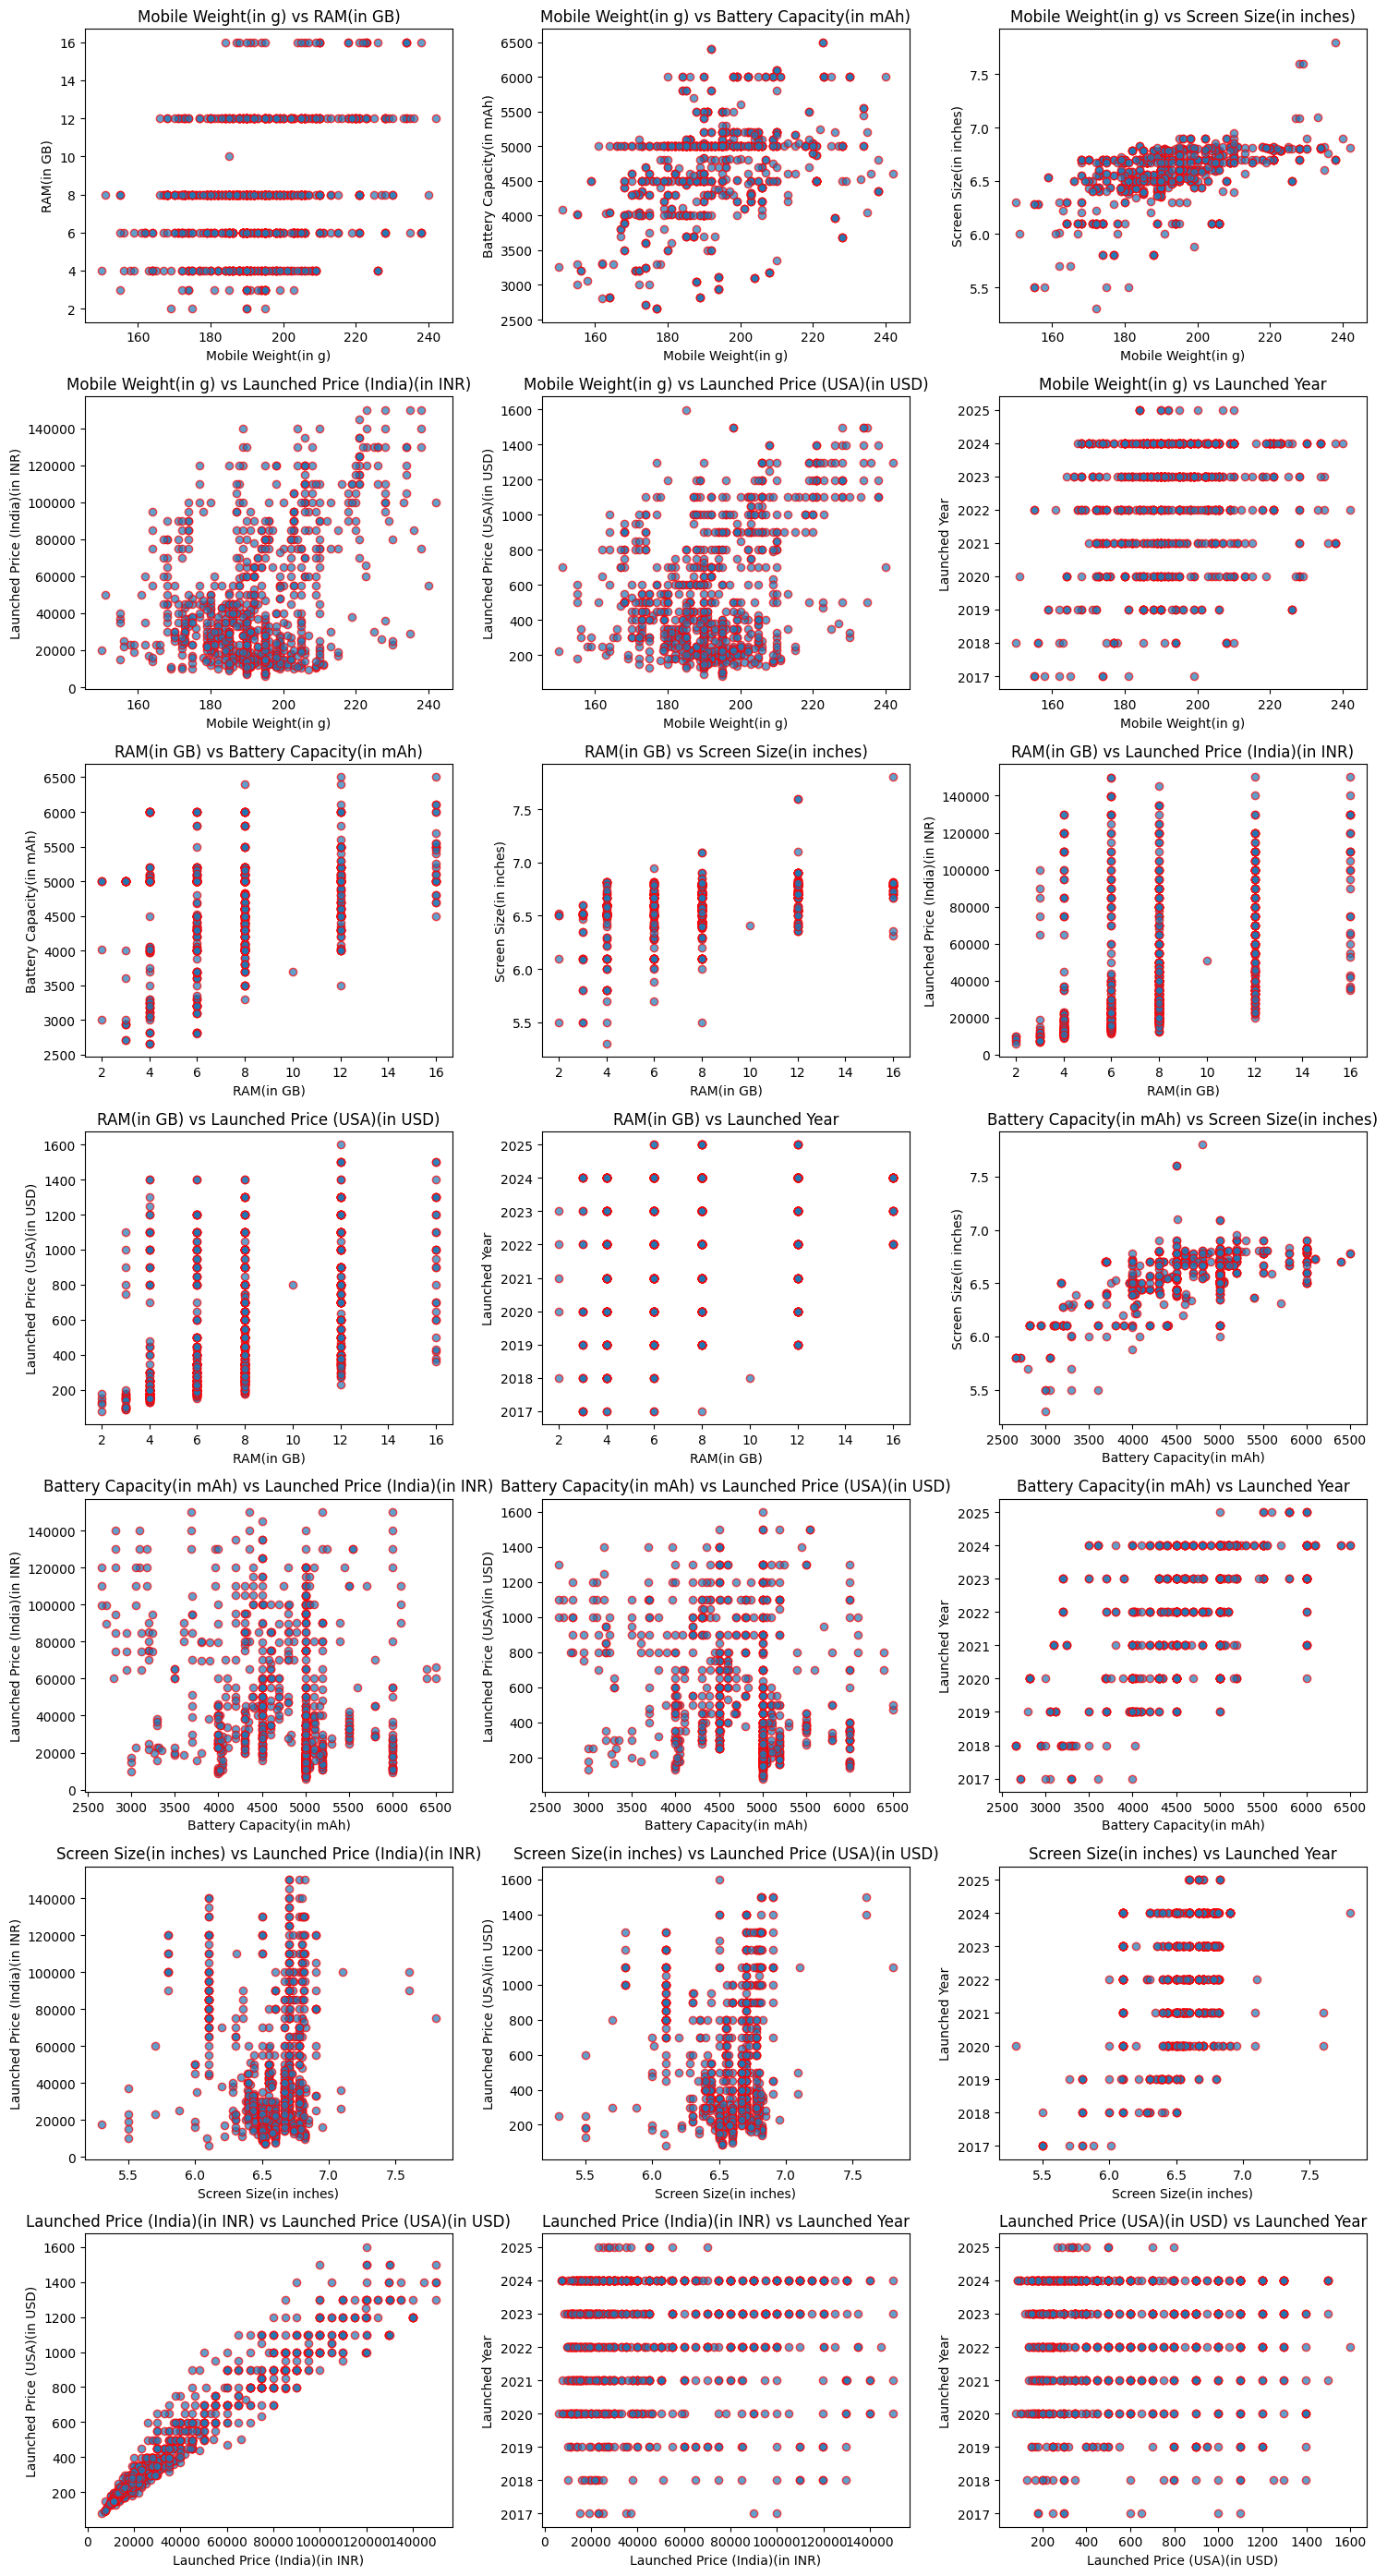

In [26]:
numerical_cols = df.select_dtypes(include=['number']).columns

n = len(numerical_cols)
n_plots = (n * (n - 1)) // 2
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

index = 0
for i in range(n):
    for j in range(i + 1, n):
        axes[index].scatter(df[numerical_cols[i]], df[numerical_cols[j]], alpha=0.7, edgecolor='r')
        axes[index].set_xlabel(numerical_cols[i])
        axes[index].set_ylabel(numerical_cols[j])
        axes[index].set_title(f'{numerical_cols[i]} vs {numerical_cols[j]}')
        index += 1

for k in range(index, len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()

Categorical V/S Numerical

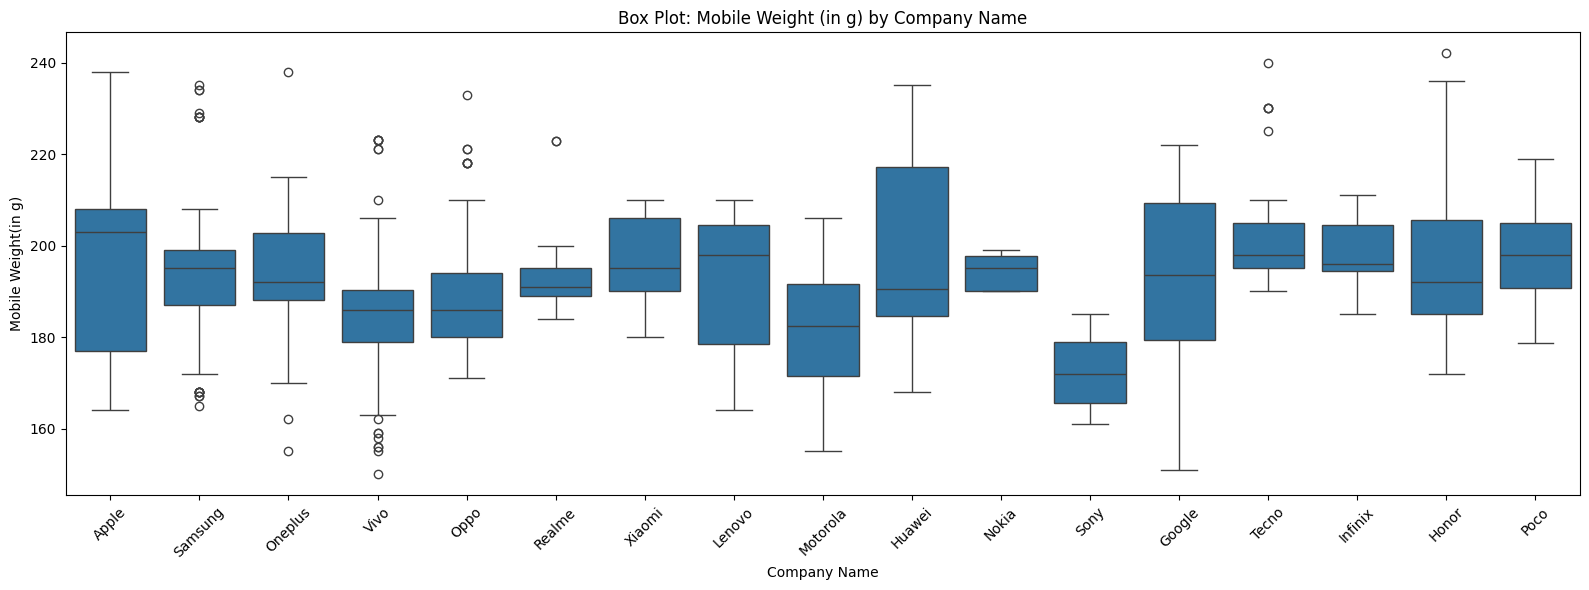

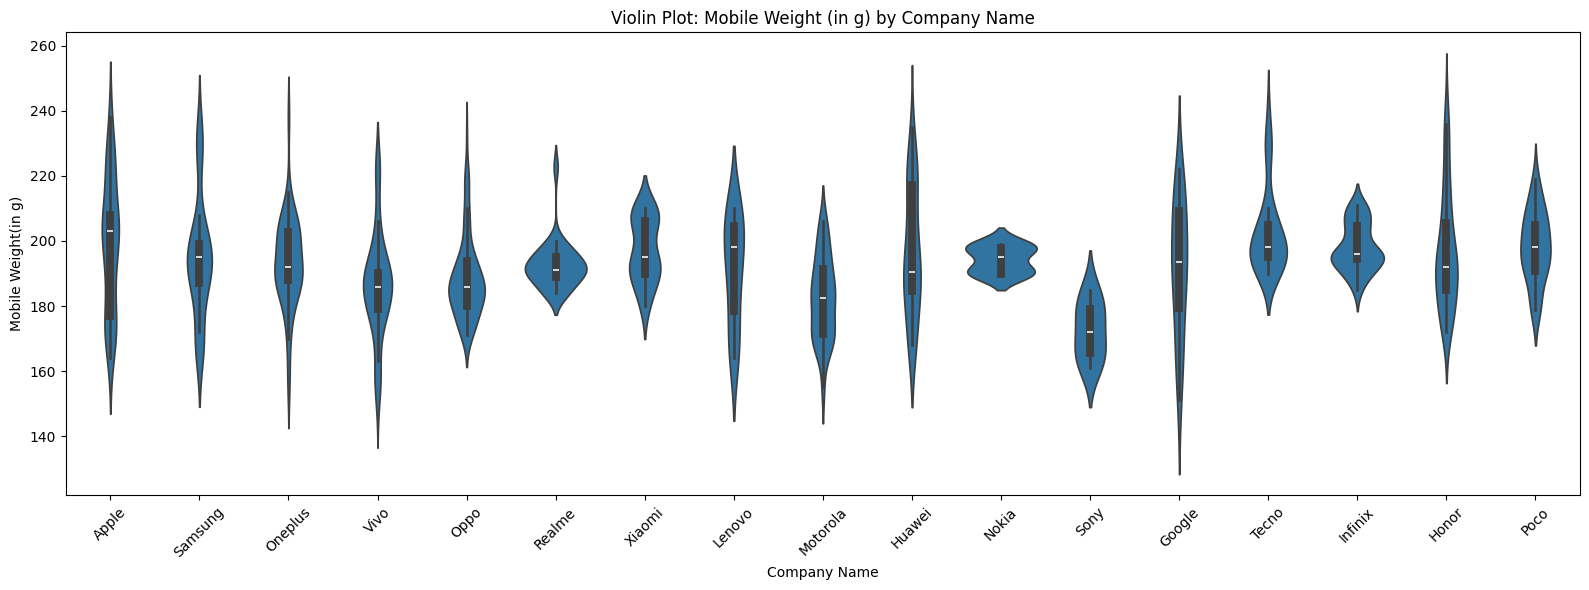

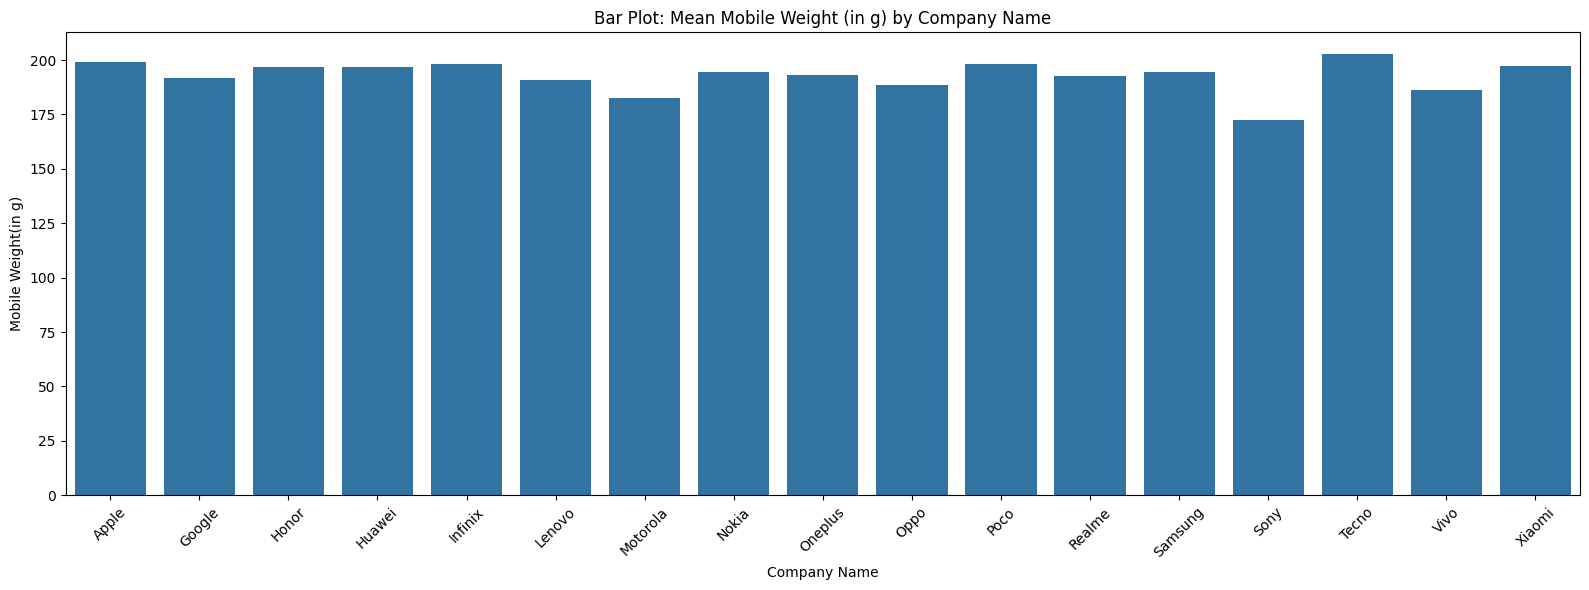

In [27]:
if 'Company Name' in df.columns and 'Mobile Weight(in g)' in df.columns:
    plt.figure(figsize=(16, 6))
    sns.boxplot(x='Company Name', y='Mobile Weight(in g)', data=df)
    plt.title("Box Plot: Mobile Weight (in g) by Company Name")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(16, 6))
    sns.violinplot(x='Company Name', y='Mobile Weight(in g)', data=df)
    plt.title("Violin Plot: Mobile Weight (in g) by Company Name")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    company_weight_mean = df.groupby('Company Name')['Mobile Weight(in g)'].mean().reset_index()
    plt.figure(figsize=(16, 6))
    sns.barplot(x='Company Name', y='Mobile Weight(in g)', data=company_weight_mean)
    plt.title("Bar Plot: Mean Mobile Weight (in g) by Company Name")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


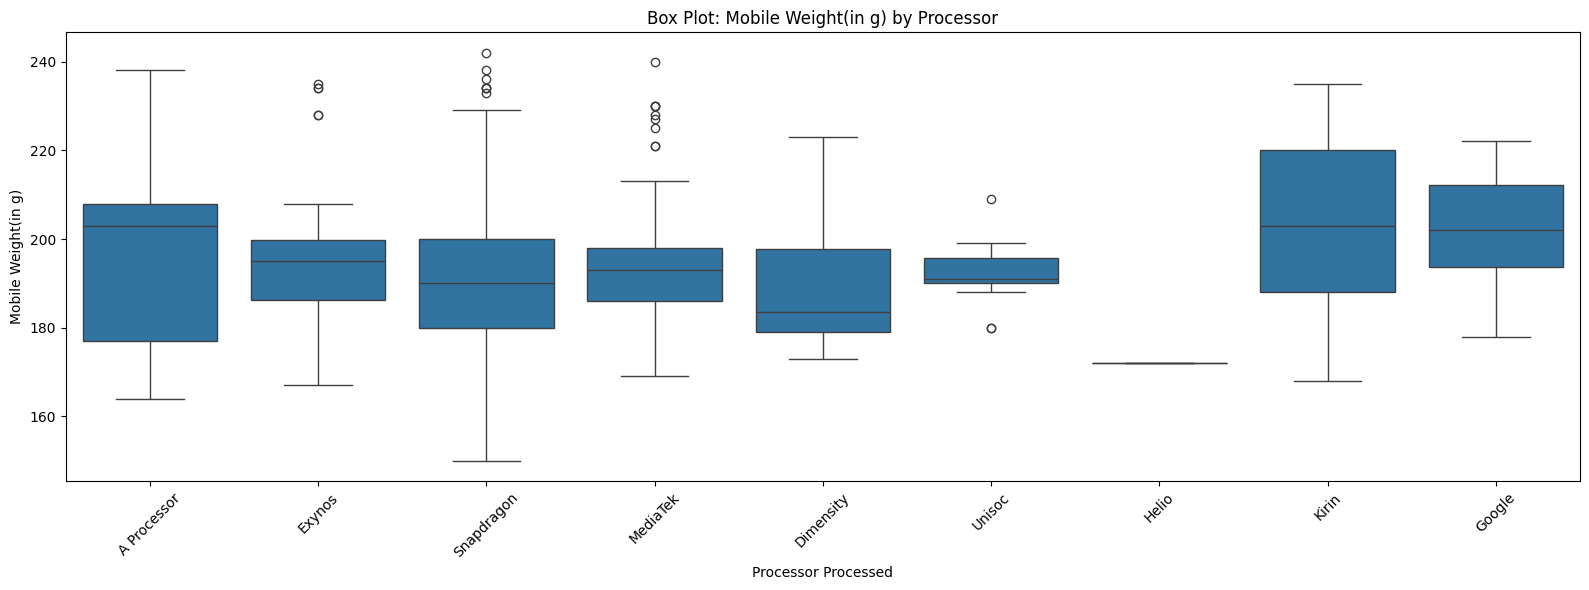

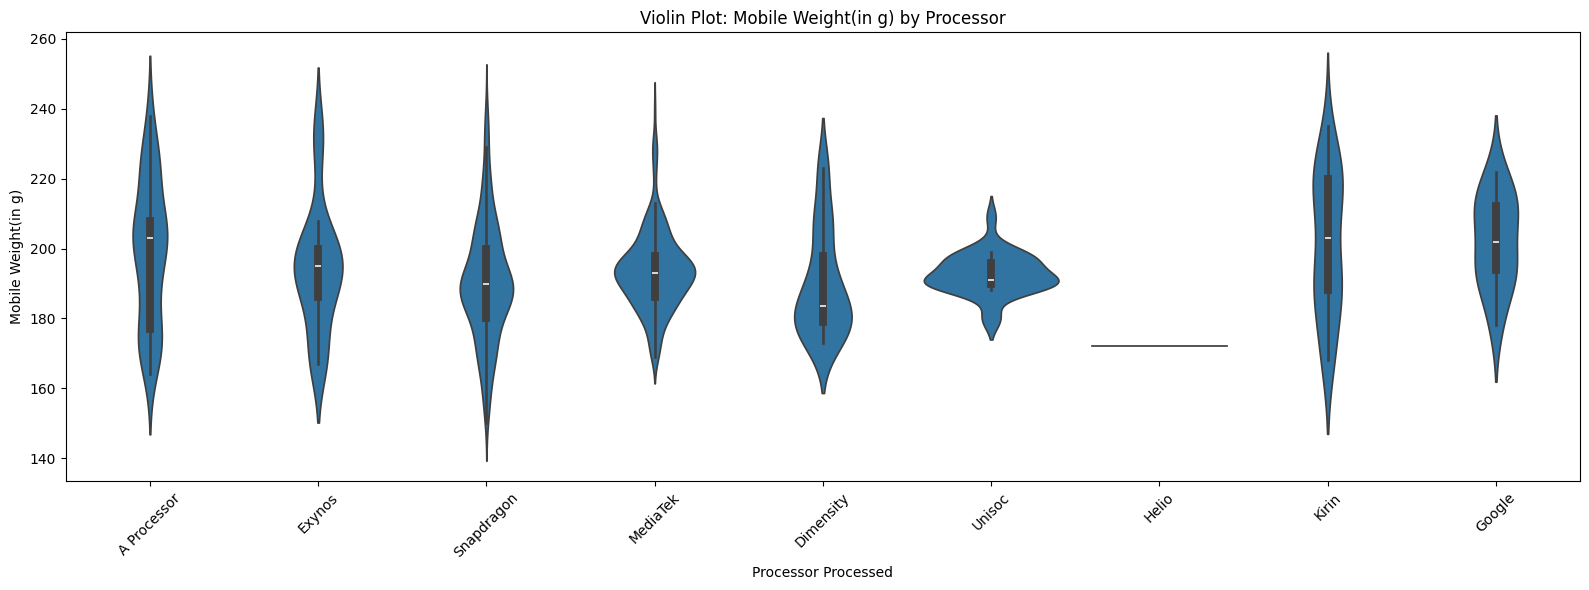

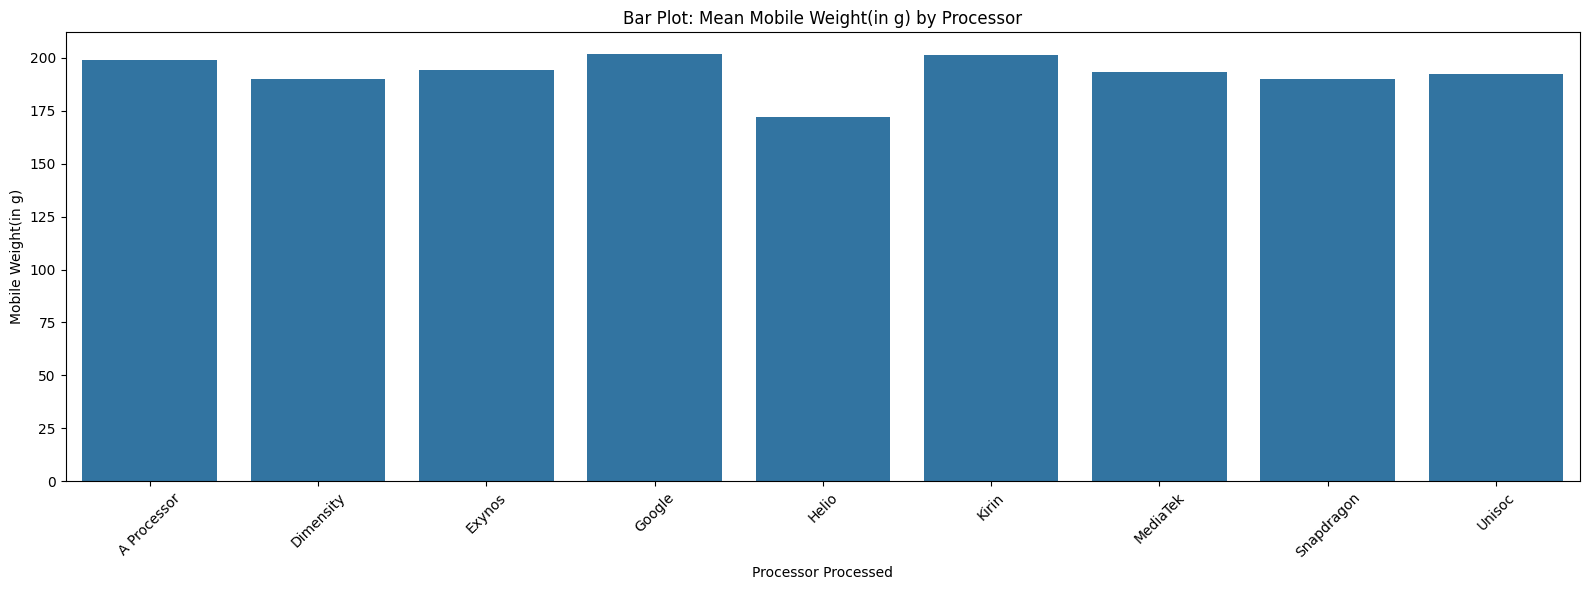

In [28]:
if 'Processor' in df.columns and 'Mobile Weight(in g)' in df.columns:
    def extract_processor_type(x):
        if pd.isna(x):
            return x
        x_str = str(x)
        x_lower = x_str.lower()
        if 'snapdragon' in x_lower:
            return 'Snapdragon'
        elif 'mediatek' in x_lower:
            return 'MediaTek'
        elif 'exynos' in x_lower:
            return 'Exynos'
        elif 'kirin' in x_lower:
            return 'Kirin'
        elif 'helio' in x_lower:
            return 'Helio'
        elif 'apple' in x_lower or x_lower.startswith('a'):
            return 'A Processor'
        else:
            return x_str.split()[0].title()
    
    df['Processor Processed'] = df['Processor'].apply(extract_processor_type)
    
    plt.figure(figsize=(16, 6))
    sns.boxplot(x='Processor Processed', y='Mobile Weight(in g)', data=df)
    plt.title("Box Plot: Mobile Weight(in g) by Processor")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16, 6))
    sns.violinplot(x='Processor Processed', y='Mobile Weight(in g)', data=df)
    plt.title("Violin Plot: Mobile Weight(in g) by Processor")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    processor_mean = df.groupby('Processor Processed')['Mobile Weight(in g)'].mean().reset_index()
    plt.figure(figsize=(16, 6))
    sns.barplot(x='Processor Processed', y='Mobile Weight(in g)', data=processor_mean)
    plt.title("Bar Plot: Mean Mobile Weight(in g) by Processor")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


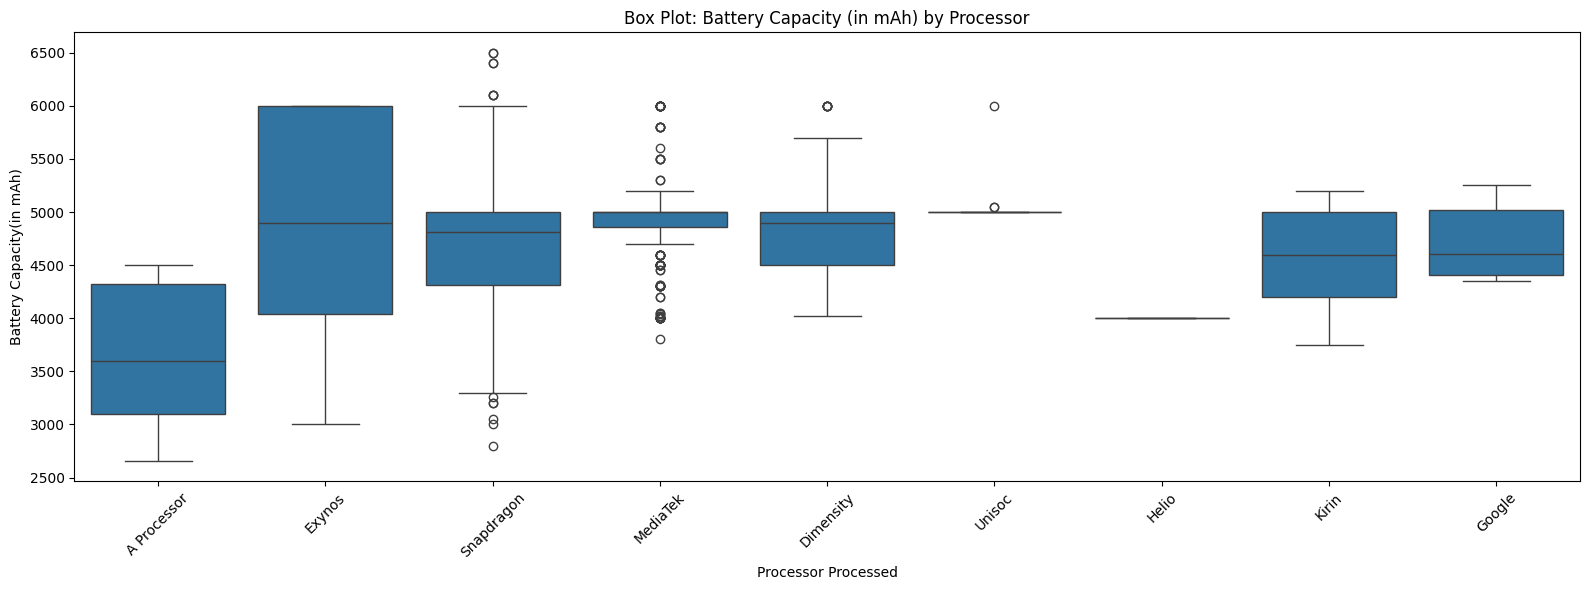

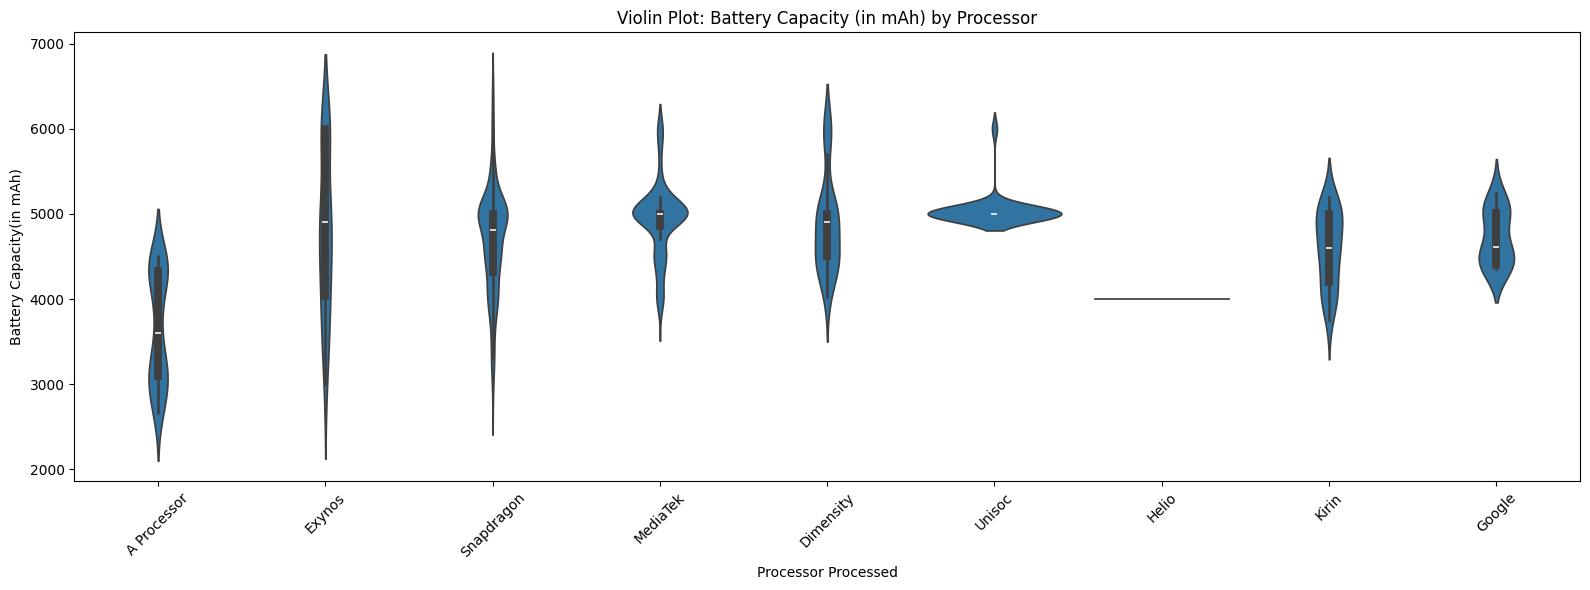

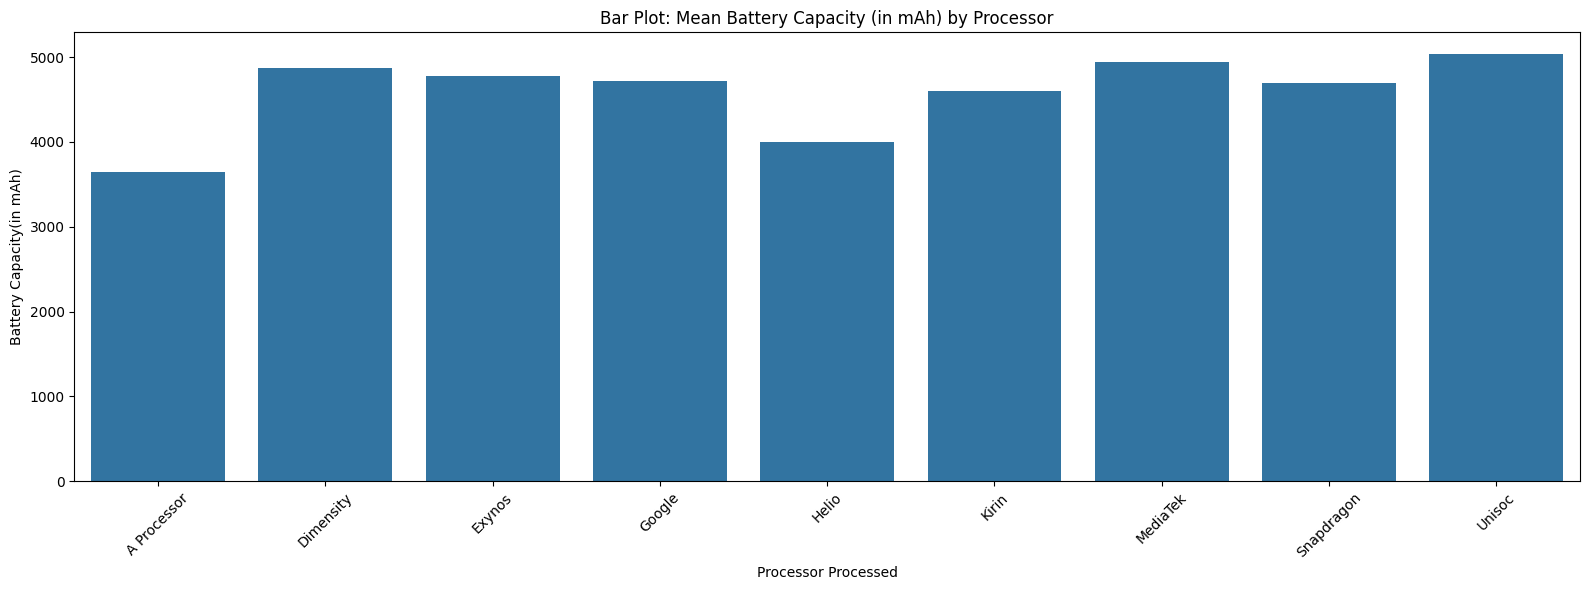

In [29]:
if 'Processor' in df.columns and 'Battery Capacity(in mAh)' in df.columns:
    def extract_processor_type(x):
        if pd.isna(x):
            return x
        x_str = str(x)
        x_lower = x_str.lower()
        if 'snapdragon' in x_lower:
            return 'Snapdragon'
        elif 'mediatek' in x_lower:
            return 'MediaTek'
        elif 'exynos' in x_lower:
            return 'Exynos'
        elif 'kirin' in x_lower:
            return 'Kirin'
        elif 'helio' in x_lower:
            return 'Helio'
        elif 'apple' in x_lower or x_lower.startswith('a'):
            return 'A Processor'
        else:
            return x_str.split()[0].title()
    
    df['Processor Processed'] = df['Processor'].apply(extract_processor_type)
    
    plt.figure(figsize=(16, 6))
    sns.boxplot(x='Processor Processed', y='Battery Capacity(in mAh)', data=df)
    plt.title("Box Plot: Battery Capacity (in mAh) by Processor")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16, 6))
    sns.violinplot(x='Processor Processed', y='Battery Capacity(in mAh)', data=df)
    plt.title("Violin Plot: Battery Capacity (in mAh) by Processor")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    processor_battery_mean = df.groupby('Processor Processed')['Battery Capacity(in mAh)'].mean().reset_index()
    plt.figure(figsize=(16, 6))
    sns.barplot(x='Processor Processed', y='Battery Capacity(in mAh)', data=processor_battery_mean)
    plt.title("Bar Plot: Mean Battery Capacity (in mAh) by Processor")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

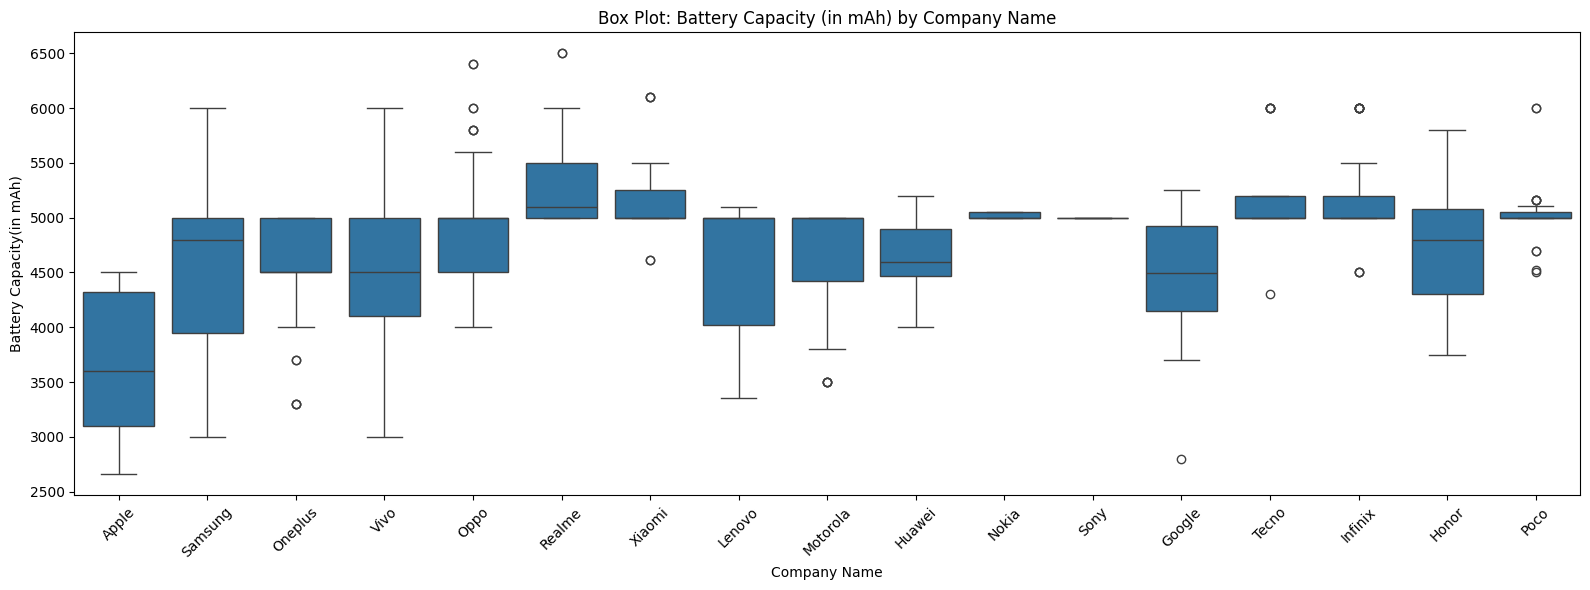

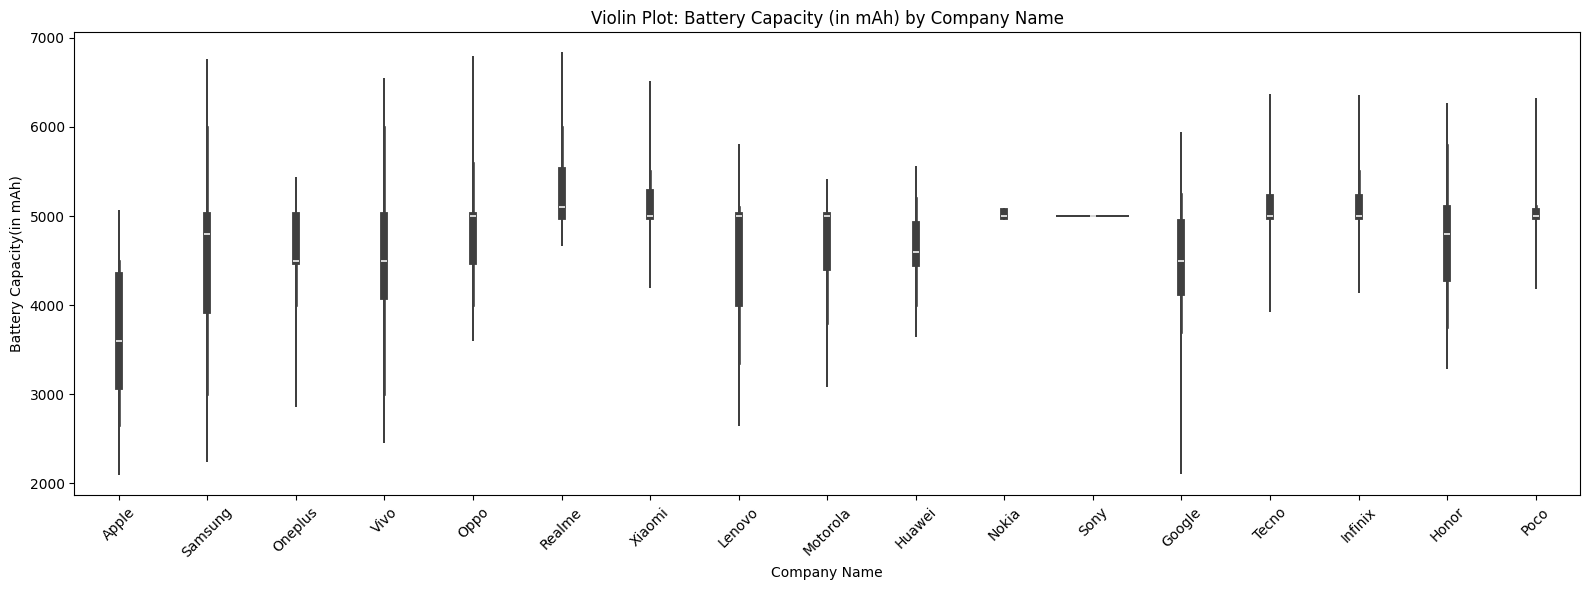

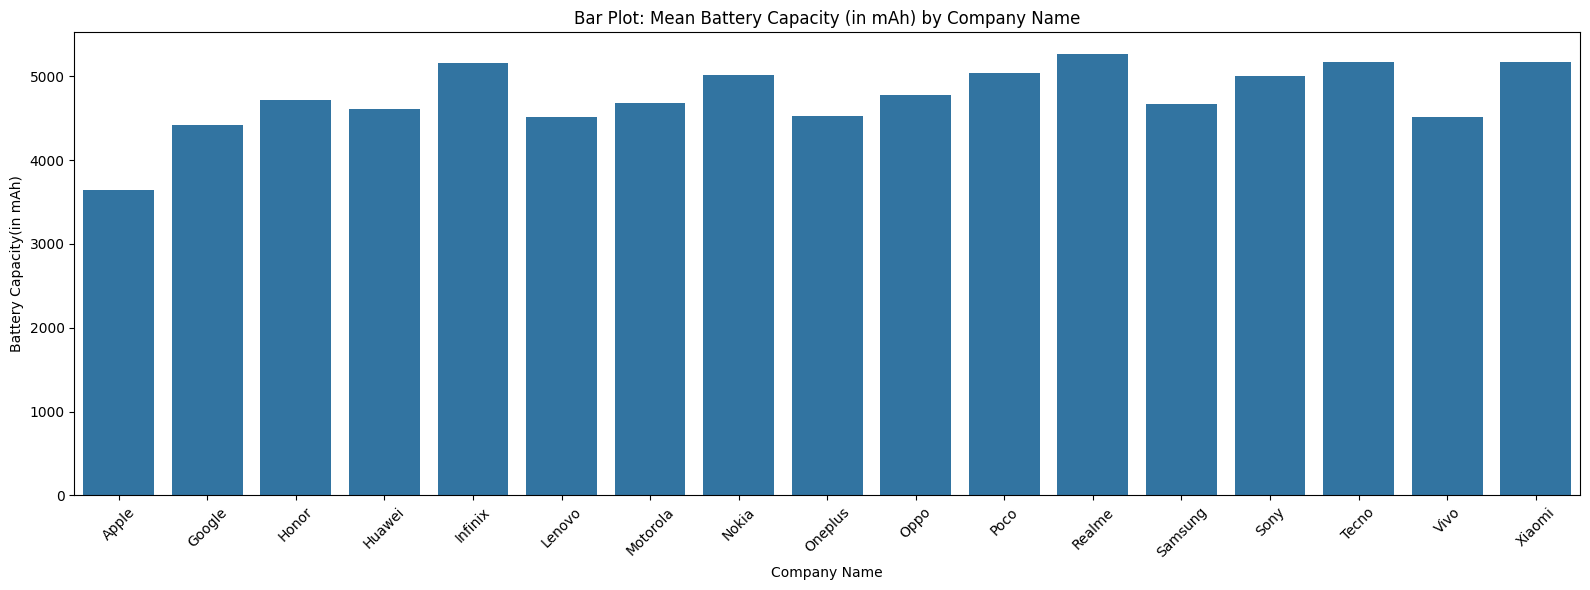

In [30]:
if 'Company Name' in df.columns and 'Battery Capacity(in mAh)' in df.columns:
    plt.figure(figsize=(16, 6))
    sns.boxplot(x='Company Name', y='Battery Capacity(in mAh)', data=df)
    plt.title("Box Plot: Battery Capacity (in mAh) by Company Name")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16, 6))
    sns.violinplot(x='Company Name', y='Battery Capacity(in mAh)', data=df)
    plt.title("Violin Plot: Battery Capacity (in mAh) by Company Name")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    company_battery_mean = df.groupby('Company Name')['Battery Capacity(in mAh)'].mean().reset_index()
    plt.figure(figsize=(16, 6))
    sns.barplot(x='Company Name', y='Battery Capacity(in mAh)', data=company_battery_mean)
    plt.title("Bar Plot: Mean Battery Capacity (in mAh) by Company Name")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

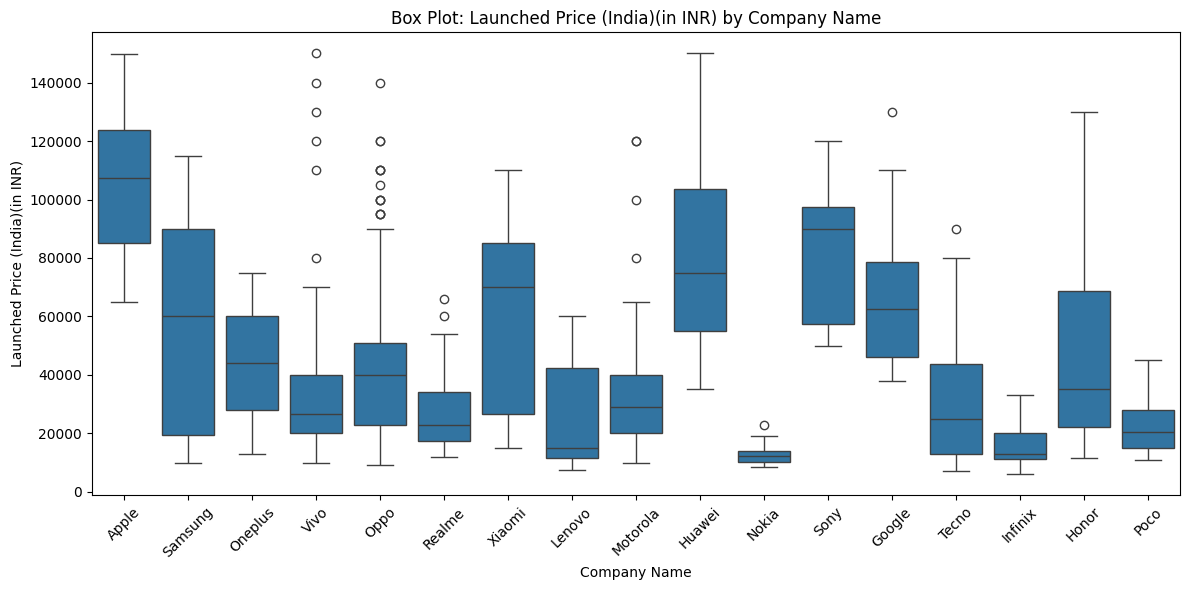

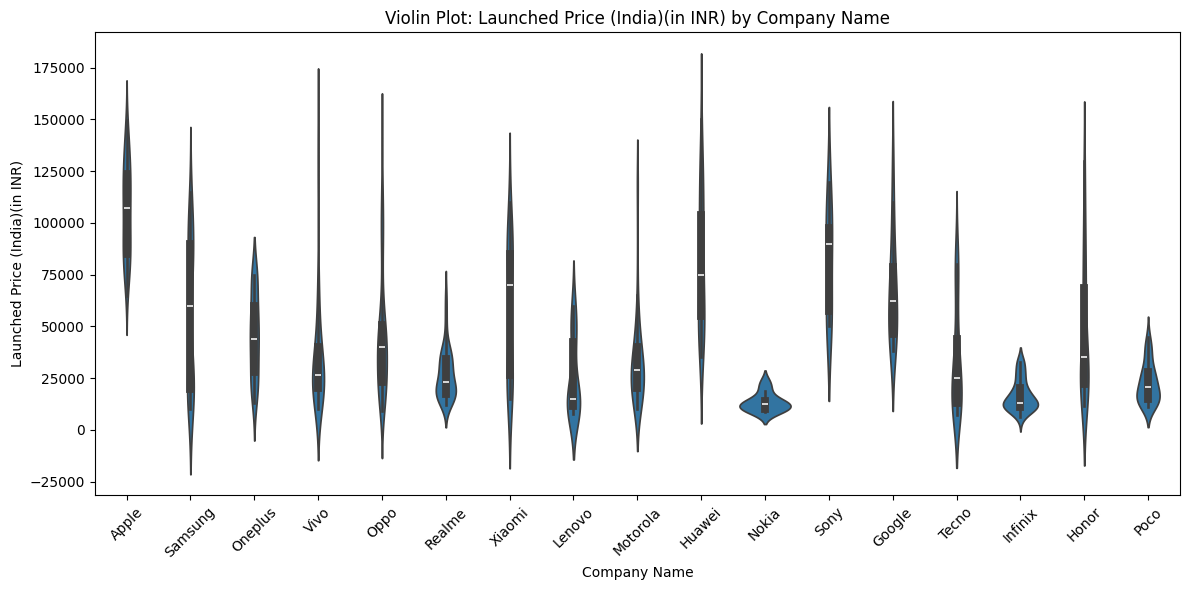

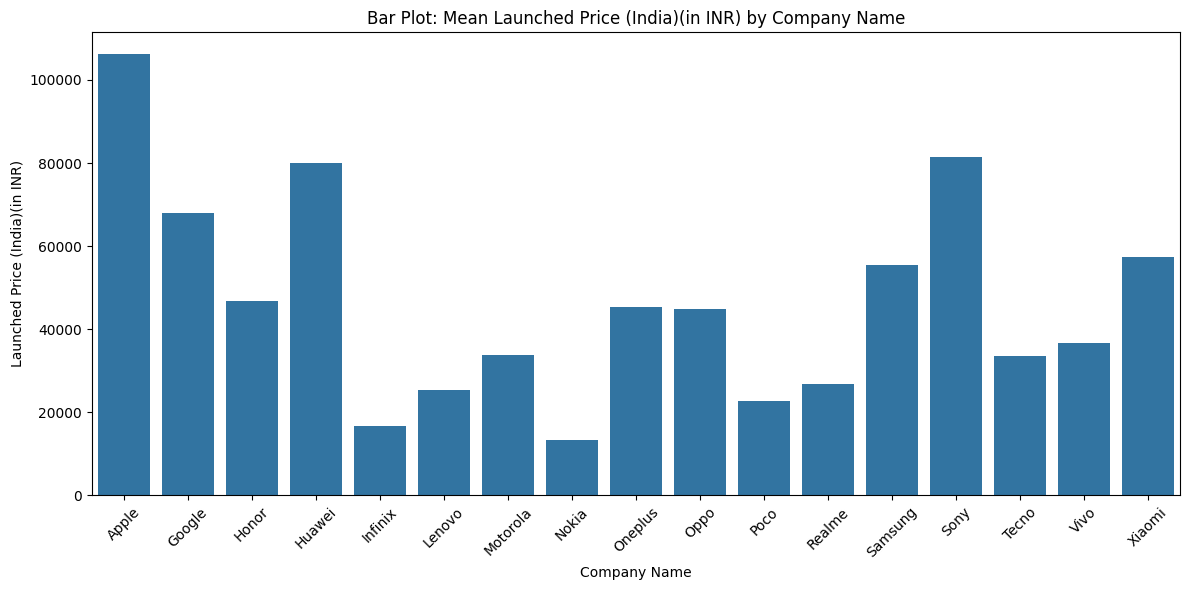

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Name', y='Launched Price (India)(in INR)', data=df)
plt.title("Box Plot: Launched Price (India)(in INR) by Company Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Company Name', y='Launched Price (India)(in INR)', data=df)
plt.title("Violin Plot: Launched Price (India)(in INR) by Company Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

company_price_mean = df.groupby('Company Name')['Launched Price (India)(in INR)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Company Name', y='Launched Price (India)(in INR)', data=company_price_mean)
plt.title("Bar Plot: Mean Launched Price (India)(in INR) by Company Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

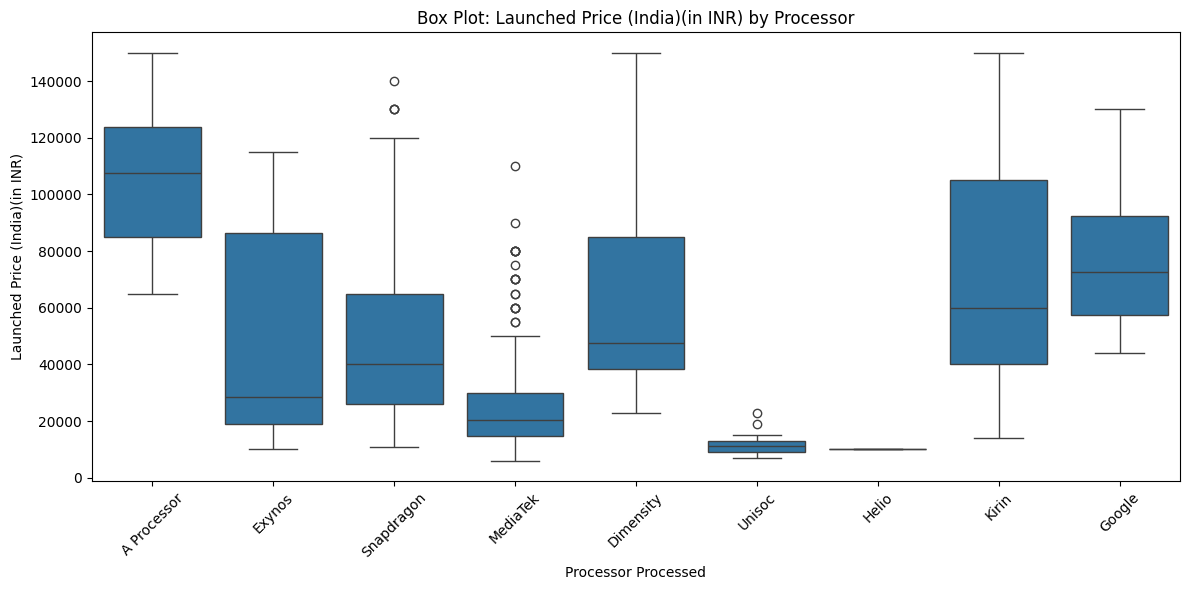

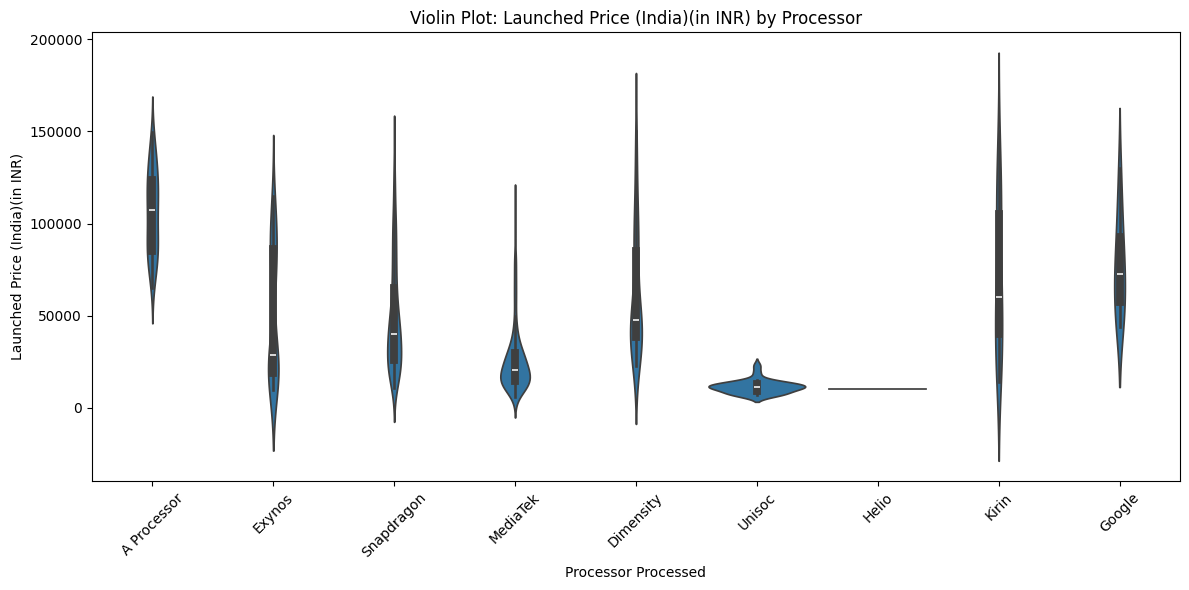

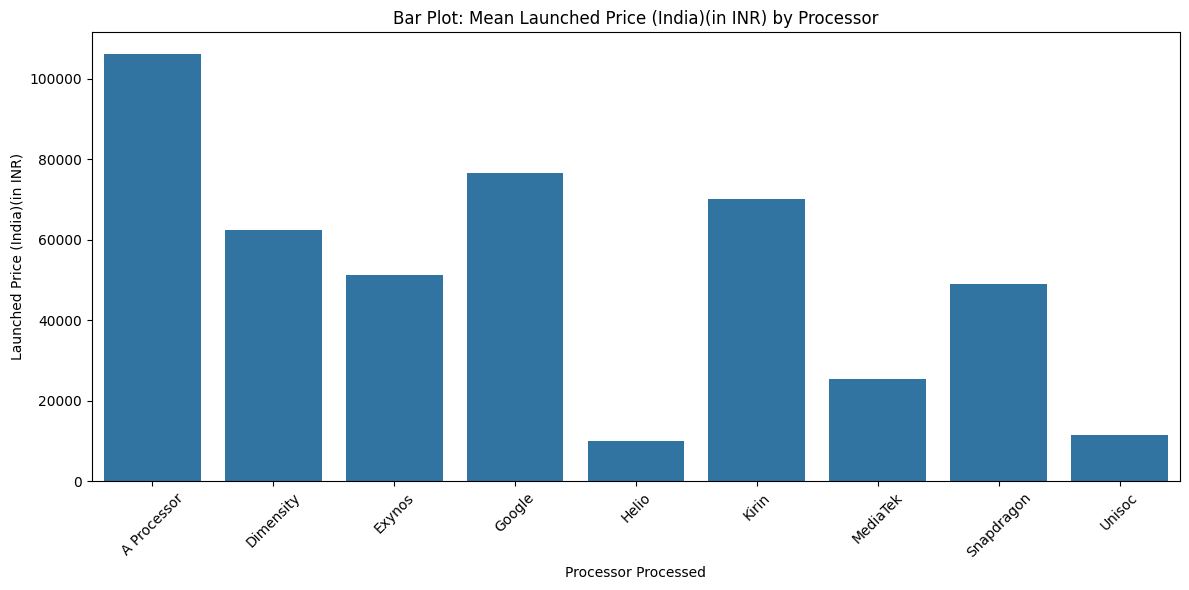

In [32]:
def extract_processor_type(x):
    if pd.isna(x):
        return x
    x_str = str(x)
    x_lower = x_str.lower()
    if 'snapdragon' in x_lower:
        return 'Snapdragon'
    elif 'mediatek' in x_lower:
        return 'MediaTek'
    elif 'exynos' in x_lower:
        return 'Exynos'
    elif 'kirin' in x_lower:
        return 'Kirin'
    elif 'helio' in x_lower:
        return 'Helio'
    elif 'apple' in x_lower or x_lower.startswith('a'):
        return 'A Processor'
    else:
        return x_str.split()[0].title()

if 'Processor' in df.columns:
    df['Processor Processed'] = df['Processor'].apply(extract_processor_type)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Processor Processed', y='Launched Price (India)(in INR)', data=df)
plt.title("Box Plot: Launched Price (India)(in INR) by Processor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Processor Processed', y='Launched Price (India)(in INR)', data=df)
plt.title("Violin Plot: Launched Price (India)(in INR) by Processor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

processor_price_mean = df.groupby('Processor Processed')['Launched Price (India)(in INR)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Processor Processed', y='Launched Price (India)(in INR)', data=processor_price_mean)
plt.title("Bar Plot: Mean Launched Price (India)(in INR) by Processor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

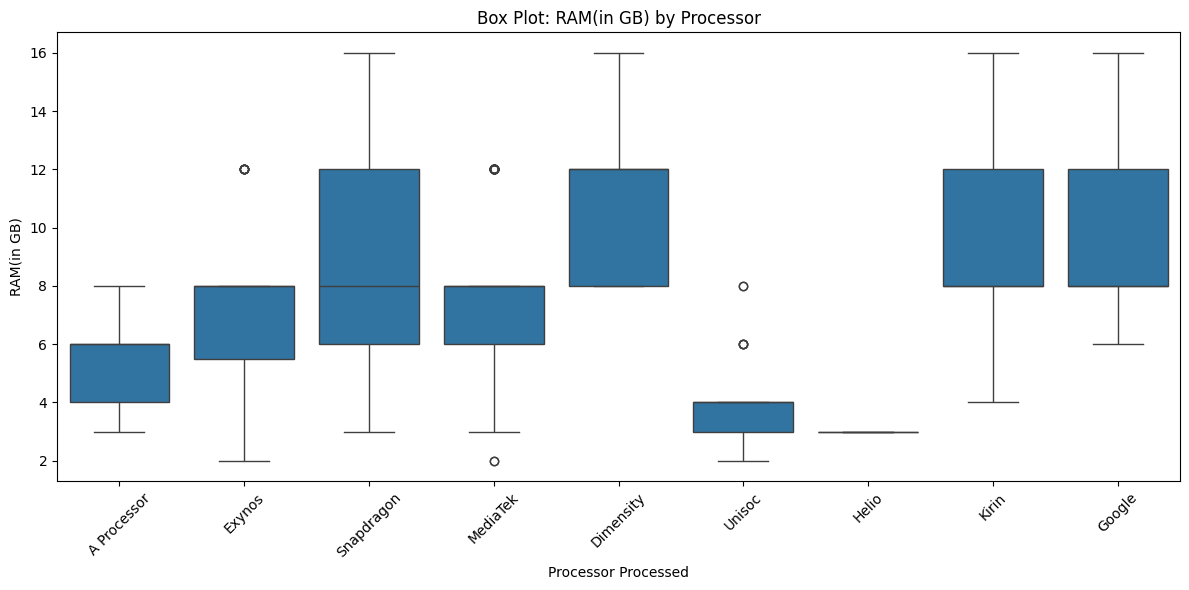

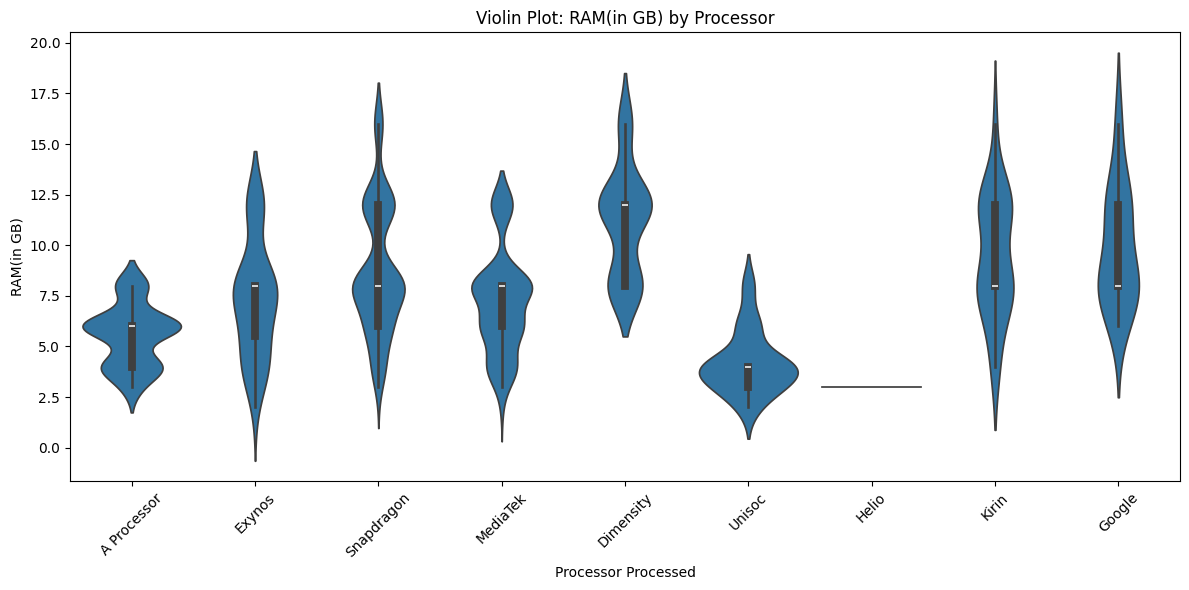

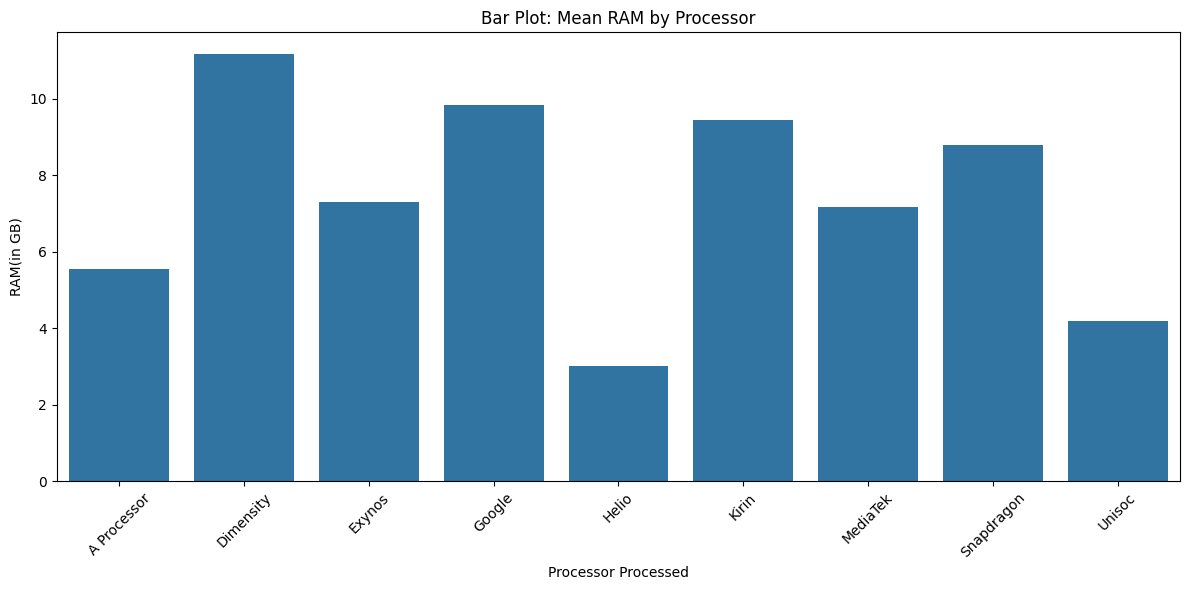

In [33]:
def extract_processor_type(x):
    if pd.isna(x):
        return x
    x_str = str(x)
    x_lower = x_str.lower()
    if 'snapdragon' in x_lower:
        return 'Snapdragon'
    elif 'mediatek' in x_lower:
        return 'MediaTek'
    elif 'exynos' in x_lower:
        return 'Exynos'
    elif 'kirin' in x_lower:
        return 'Kirin'
    elif 'helio' in x_lower:
        return 'Helio'
    elif 'apple' in x_lower or x_lower.startswith('a'):
        return 'A Processor'
    else:
        return x_str.split()[0].title()

if 'Processor' in df.columns:
    df['Processor Processed'] = df['Processor'].apply(extract_processor_type)

# RAM(in GB) vs Processor: Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Processor Processed', y='RAM(in GB)', data=df)
plt.title("Box Plot: RAM(in GB) by Processor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RAM(in GB) vs Processor: Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Processor Processed', y='RAM(in GB)', data=df)
plt.title("Violin Plot: RAM(in GB) by Processor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RAM(in GB) vs Processor: Bar Plot of Mean RAM(in GB) by Processor
ram_by_processor_mean = df.groupby('Processor Processed')['RAM(in GB)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Processor Processed', y='RAM(in GB)', data=ram_by_processor_mean)
plt.title("Bar Plot: Mean RAM by Processor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

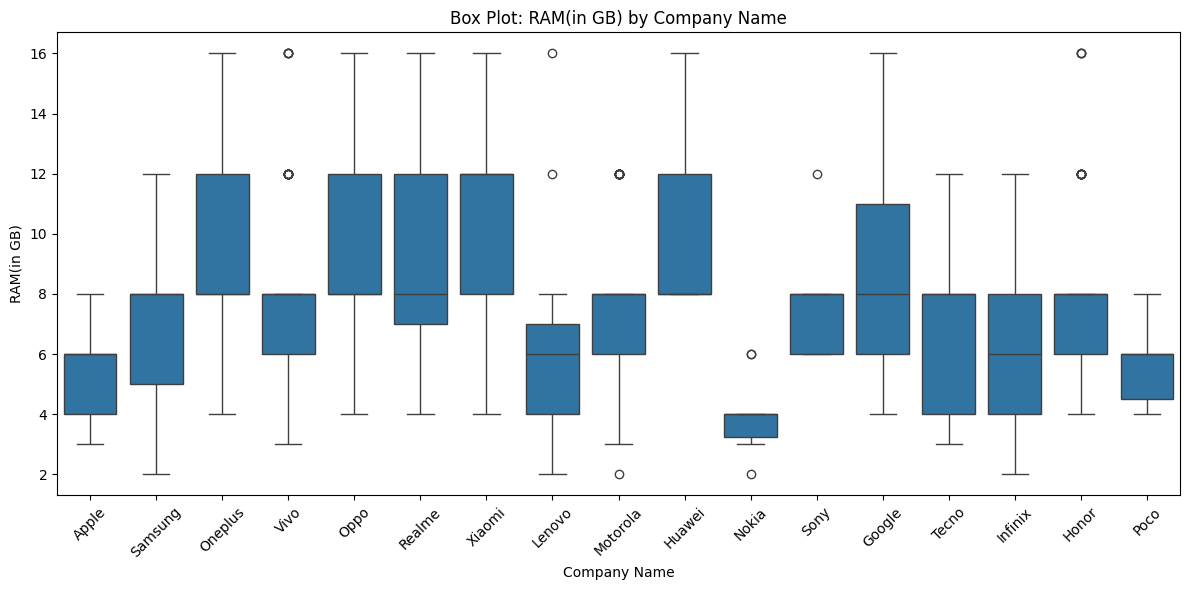

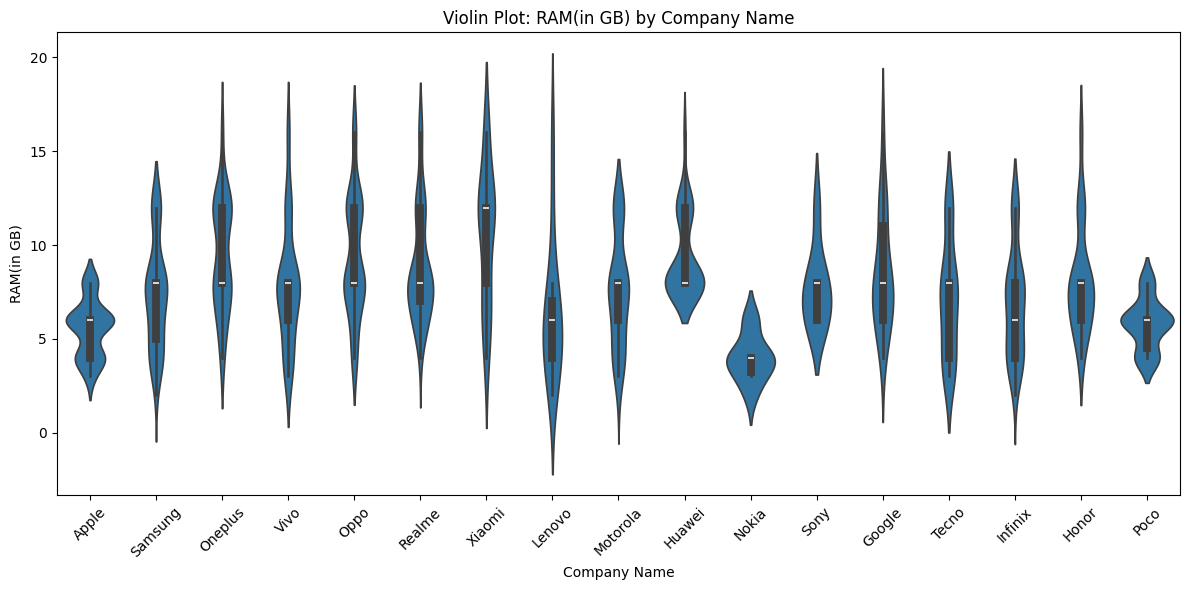

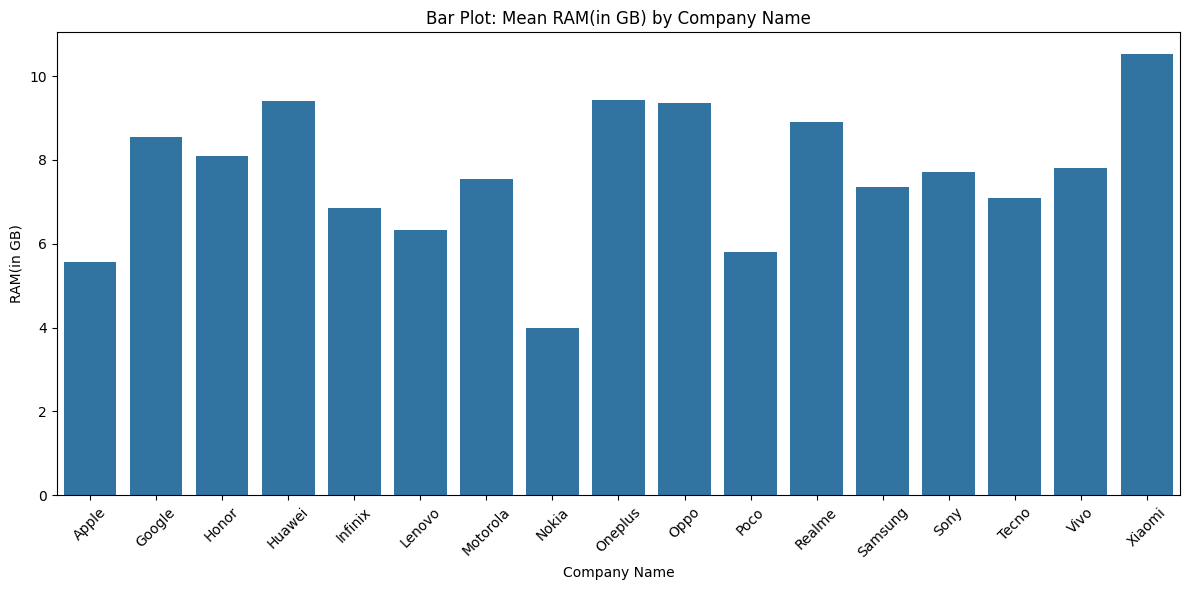

In [34]:
def extract_processor_type(x):
    if pd.isna(x):
        return x
    x_str = str(x)
    x_lower = x_str.lower()
    if 'snapdragon' in x_lower:
        return 'Snapdragon'
    elif 'mediatek' in x_lower:
        return 'MediaTek'
    elif 'exynos' in x_lower:
        return 'Exynos'
    elif 'kirin' in x_lower:
        return 'Kirin'
    elif 'helio' in x_lower:
        return 'Helio'
    elif 'apple' in x_lower or x_lower.startswith('a'):
        return 'A Processor'
    else:
        return x_str.split()[0].title()
    
# RAM(in GB) vs Company Name: Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Name', y='RAM(in GB)', data=df)
plt.title("Box Plot: RAM(in GB) by Company Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RAM(in GB) vs Company Name: Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Company Name', y='RAM(in GB)', data=df)
plt.title("Violin Plot: RAM(in GB) by Company Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RAM(in GB) vs Company Name: Bar Plot of Mean RAM(in GB) by Company Name
ram_by_company_mean = df.groupby('Company Name')['RAM(in GB)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Company Name', y='RAM(in GB)', data=ram_by_company_mean)
plt.title("Bar Plot: Mean RAM(in GB) by Company Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Categorical V/S Categorical

Processor Processed  A Processor  Dimensity  Exynos  Google  Helio  Kirin  \
Company Name                                                                
Apple                         74          0       0       0      0      0   
Google                         0          0       0      12      0      0   
Honor                          0          0       0       0      0      8   
Huawei                         0          0       0       0      0     17   
Infinix                        0          0       0       0      0      0   
Lenovo                         0          0       0       0      1      0   
Motorola                       0          0       2       0      0      0   
Nokia                          0          0       0       0      0      0   
Oneplus                        0          0       0       0      0      0   
Oppo                           0         31       0       0      0      0   
Poco                           0          0       0       0      0      0   

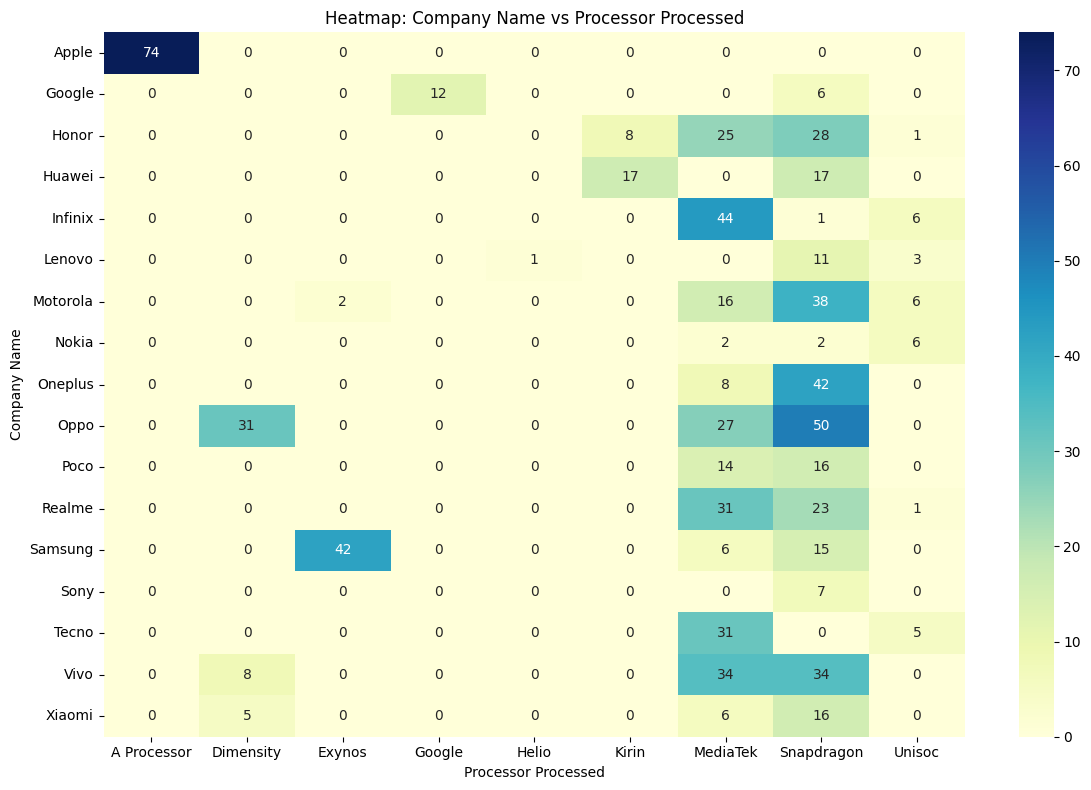

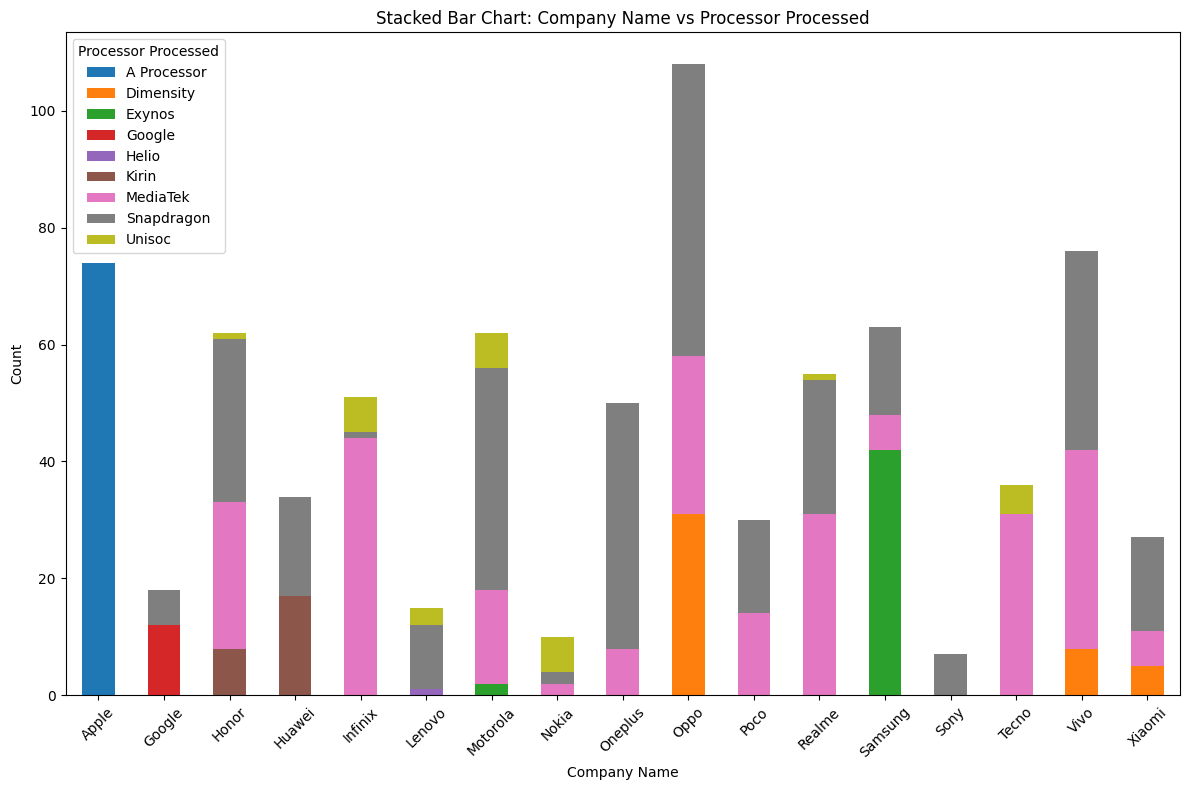

In [35]:
def extract_processor_type(x):
    if pd.isna(x):
        return x
    x_str = str(x)
    x_lower = x_str.lower()
    if 'snapdragon' in x_lower:
        return 'Snapdragon'
    elif 'mediatek' in x_lower:
        return 'MediaTek'
    elif 'exynos' in x_lower:
        return 'Exynos'
    elif 'kirin' in x_lower:
        return 'Kirin'
    elif 'helio' in x_lower:
        return 'Helio'
    elif 'apple' in x_lower or x_lower.startswith('a'):
        return 'A Processor'
    else:
        return x_str.split()[0].title()

if 'Processor' in df.columns:
    df['Processor Processed'] = df['Processor'].apply(extract_processor_type)

crosstab = pd.crosstab(df['Company Name'], df['Processor Processed'])
print(crosstab)

plt.figure(figsize=(12,8))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap: Company Name vs Processor Processed")
plt.xlabel("Processor Processed")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()

crosstab.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title("Stacked Bar Chart: Company Name vs Processor Processed")
plt.xlabel("Company Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Multivariate Analysis

Numerical Analysis

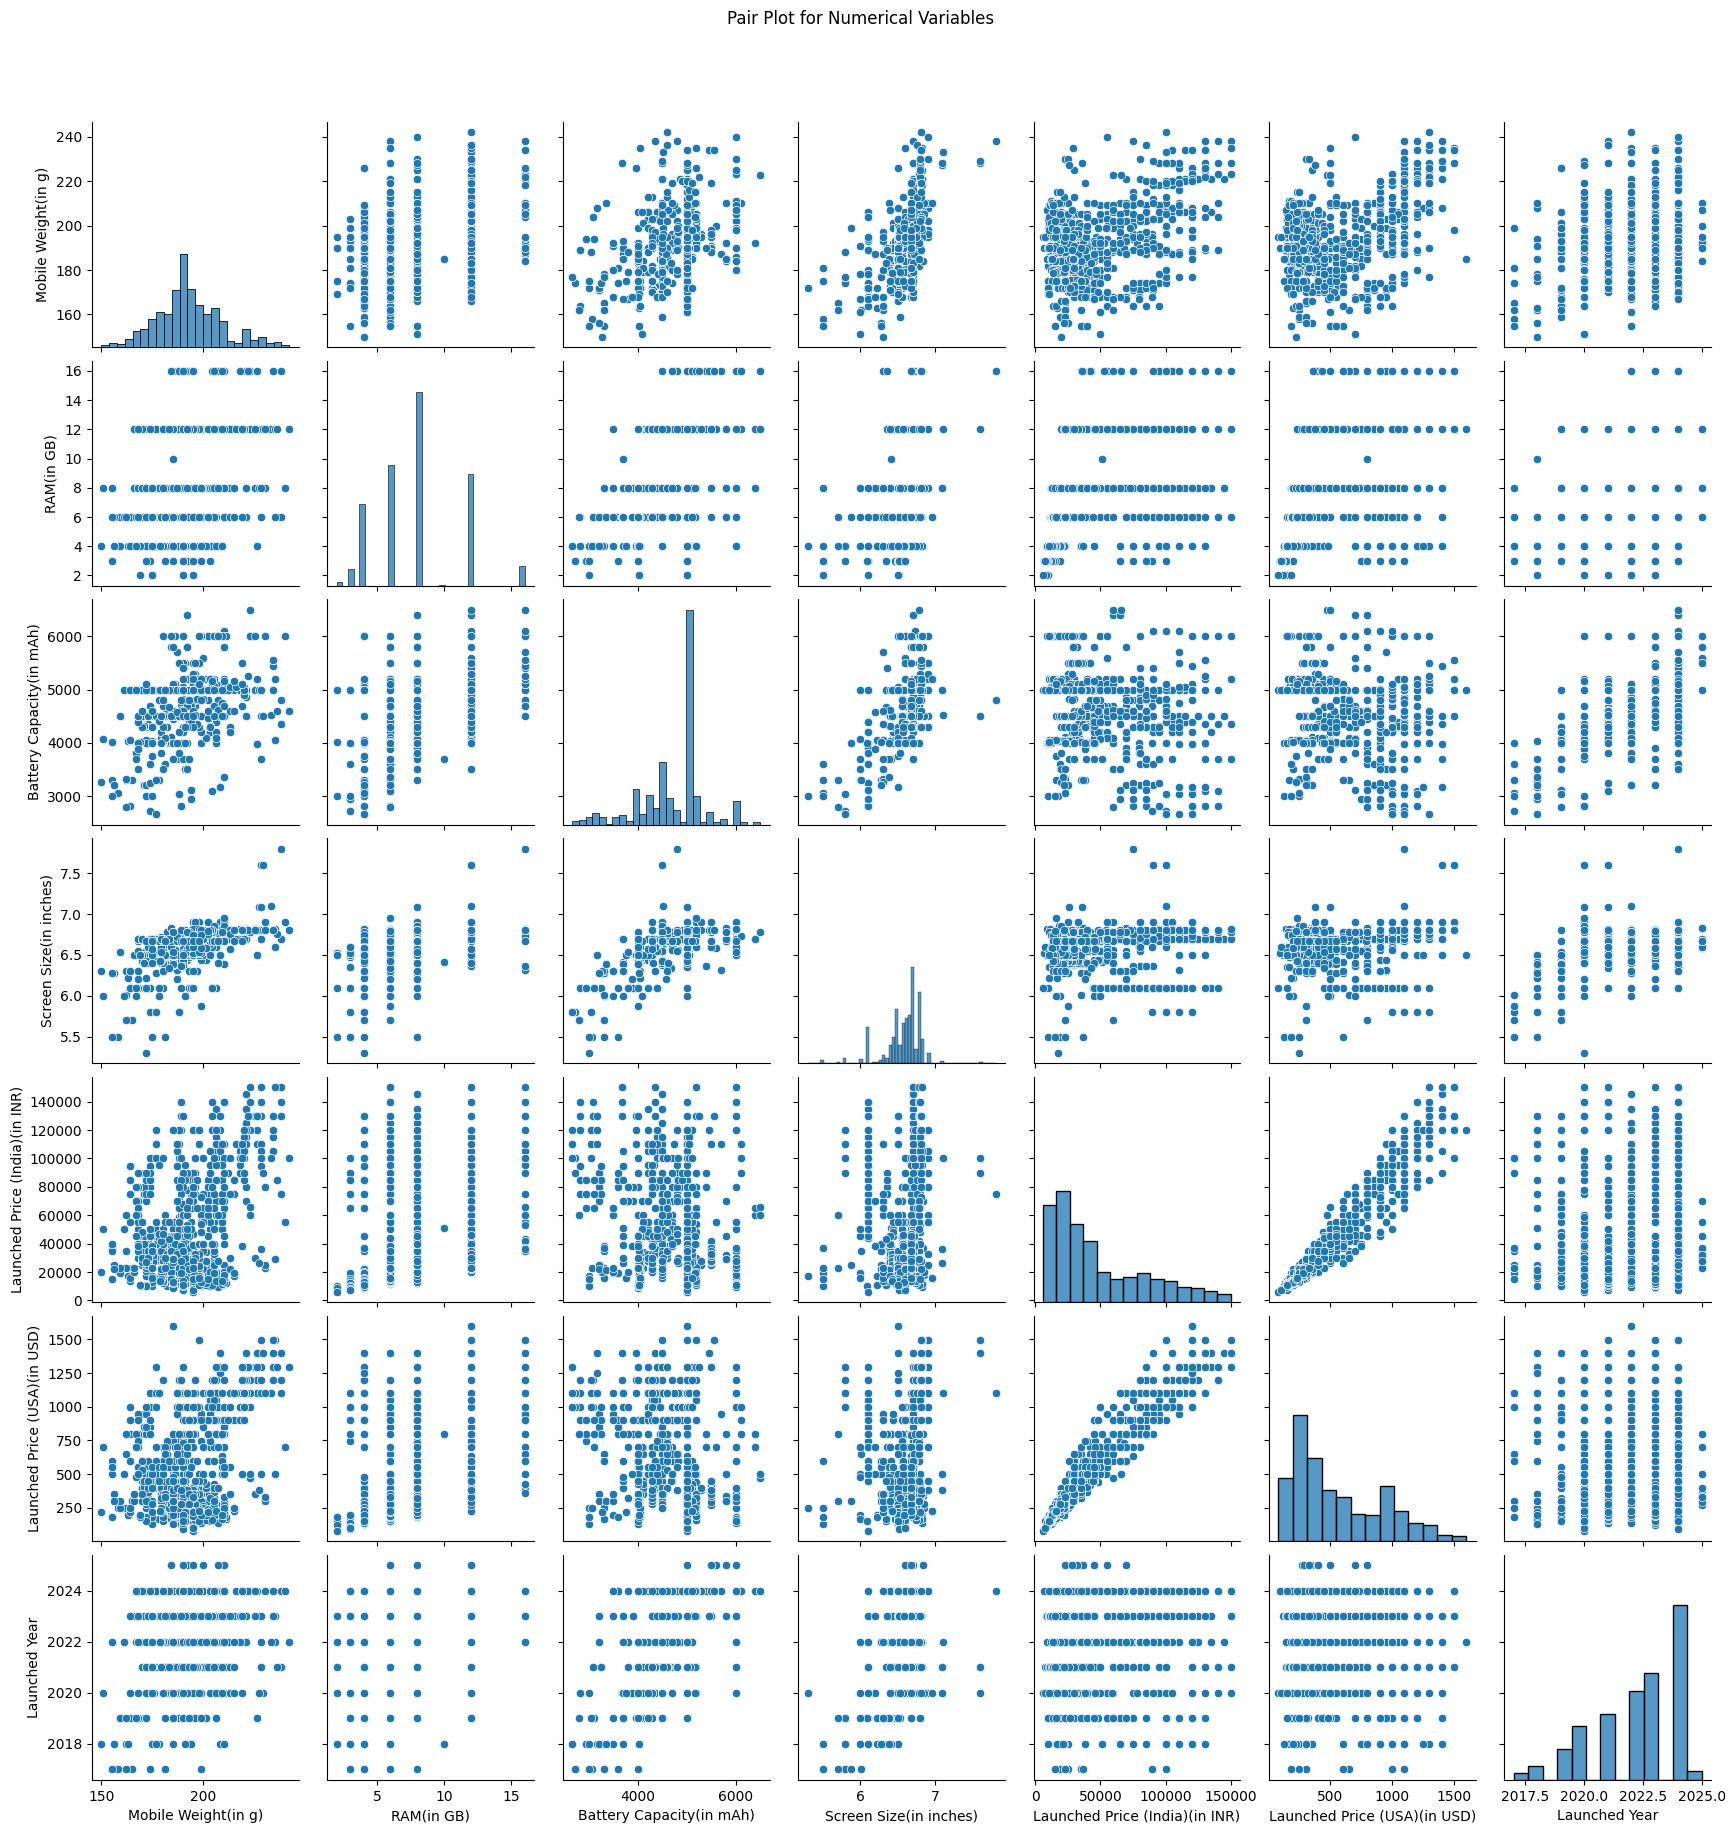

In [36]:
sns.pairplot(df[numerical_cols])
plt.suptitle("Pair Plot for Numerical Variables", y=1.05)
plt.show()

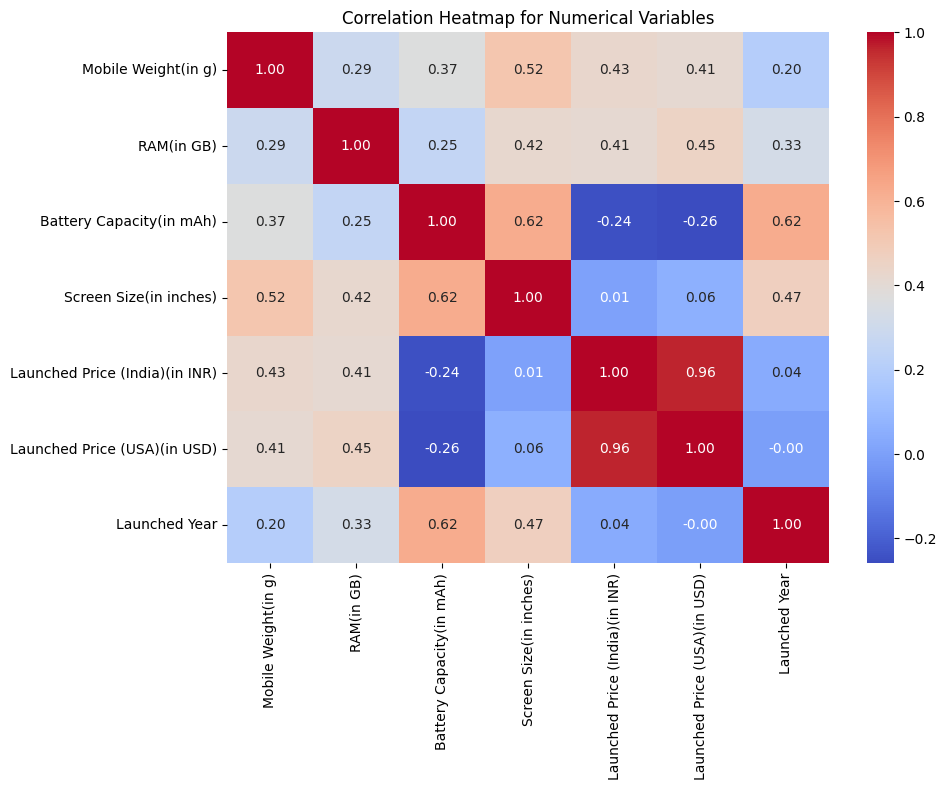

In [37]:
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numerical Variables")
plt.tight_layout()
plt.show()

Numerical & Categorical

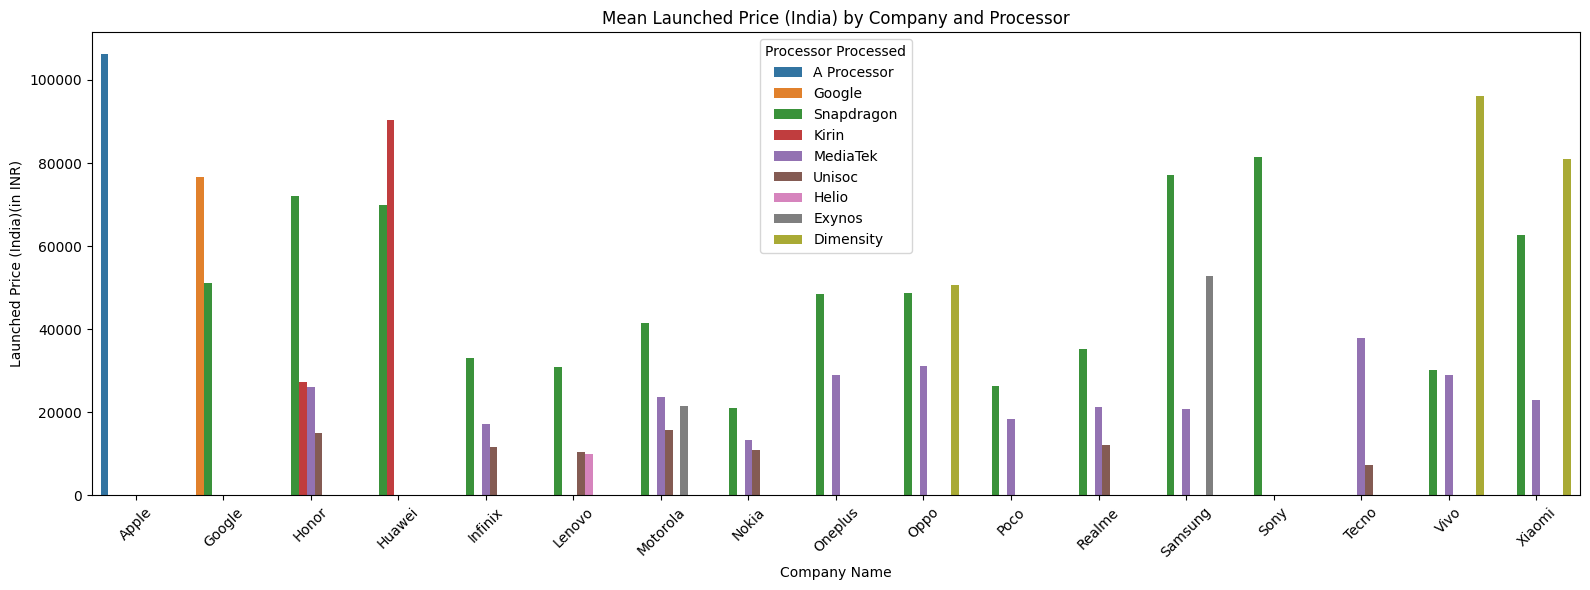

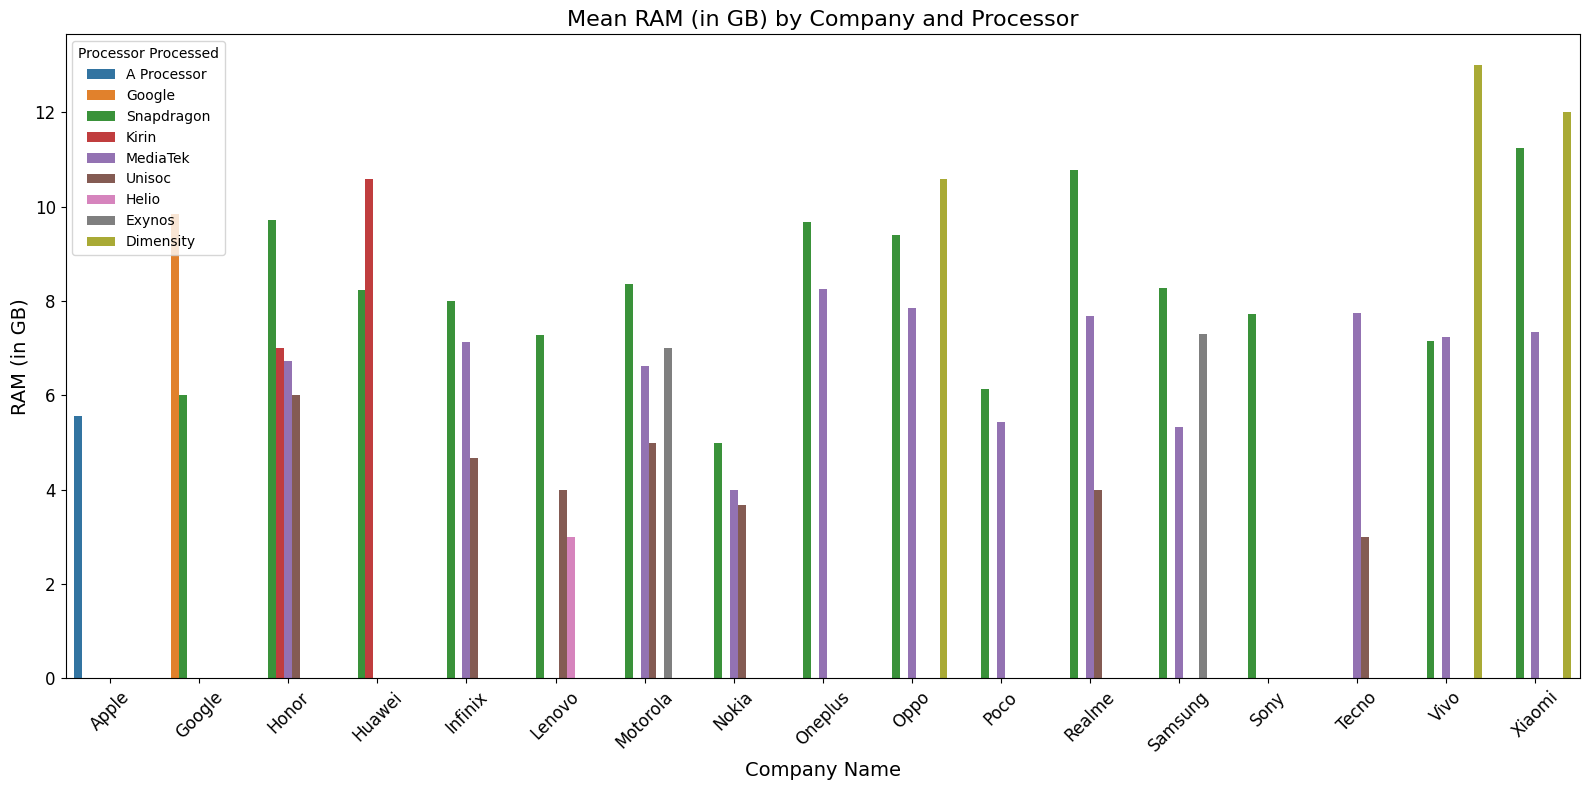

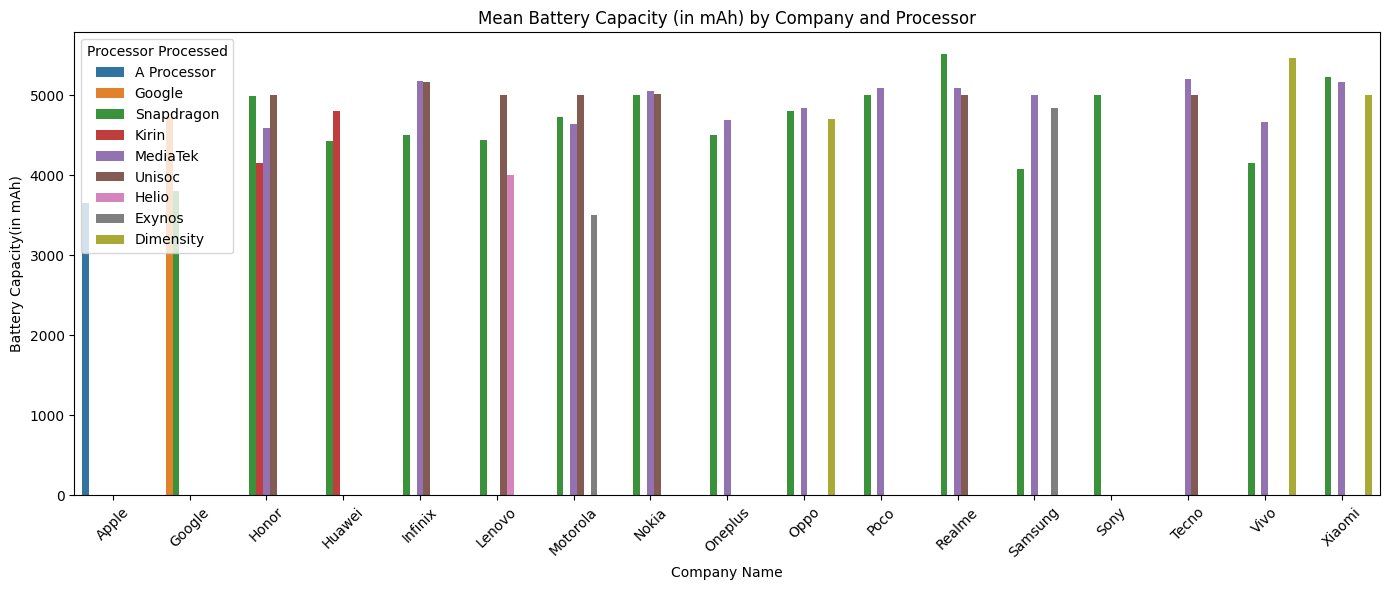

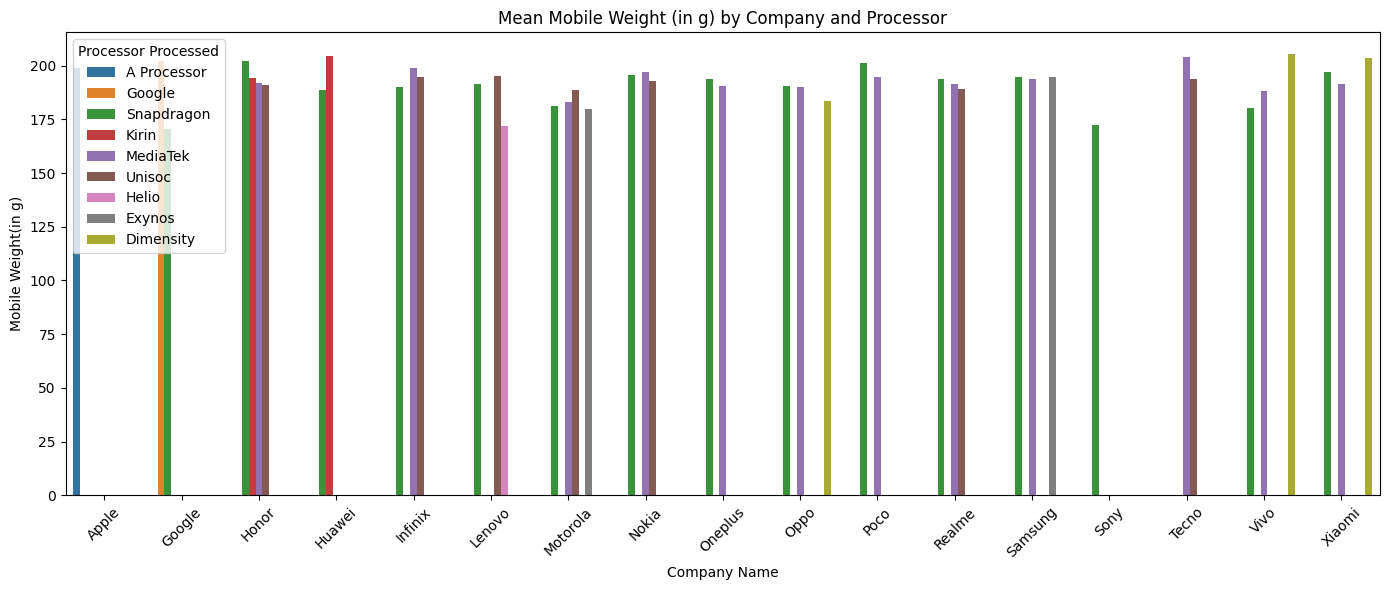

In [38]:
def extract_processor_type(x):
    if pd.isna(x):
        return x
    x_str = str(x)
    x_lower = x_str.lower()
    if 'snapdragon' in x_lower:
        return 'Snapdragon'
    elif 'mediatek' in x_lower:
        return 'MediaTek'
    elif 'exynos' in x_lower:
        return 'Exynos'
    elif 'kirin' in x_lower:
        return 'Kirin'
    elif 'helio' in x_lower:
        return 'Helio'
    elif 'apple' in x_lower or x_lower.startswith('a'):
        return 'A Processor'
    else:
        return x_str.split()[0].title()
    

    
grouped_price = df.groupby(['Company Name', 'Processor Processed'])['Launched Price (India)(in INR)'].mean().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x='Company Name', y='Launched Price (India)(in INR)', hue='Processor Processed', data=grouped_price)
plt.title("Mean Launched Price (India) by Company and Processor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

grouped_ram = df.groupby(['Company Name', 'Processor Processed'])['RAM(in GB)'].mean().reset_index()

plt.figure(figsize=(16,8))
ax = sns.barplot(x='Company Name', y='RAM(in GB)', hue='Processor Processed', data=grouped_ram)
plt.title("Mean RAM (in GB) by Company and Processor", fontsize=16)
plt.xlabel("Company Name", fontsize=14)
plt.ylabel("RAM (in GB)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

grouped_battery = df.groupby(['Company Name', 'Processor Processed'])['Battery Capacity(in mAh)'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(x='Company Name', y='Battery Capacity(in mAh)', hue='Processor Processed', data=grouped_battery)
plt.title("Mean Battery Capacity (in mAh) by Company and Processor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

grouped_weight = df.groupby(['Company Name', 'Processor Processed'])['Mobile Weight(in g)'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(x='Company Name', y='Mobile Weight(in g)', hue='Processor Processed', data=grouped_weight)
plt.title("Mean Mobile Weight (in g) by Company and Processor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3d Plots

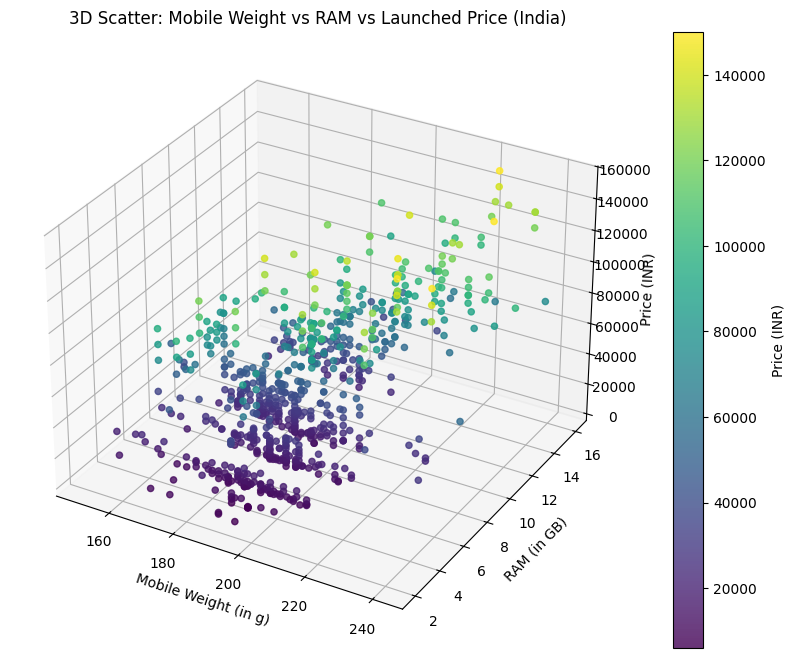

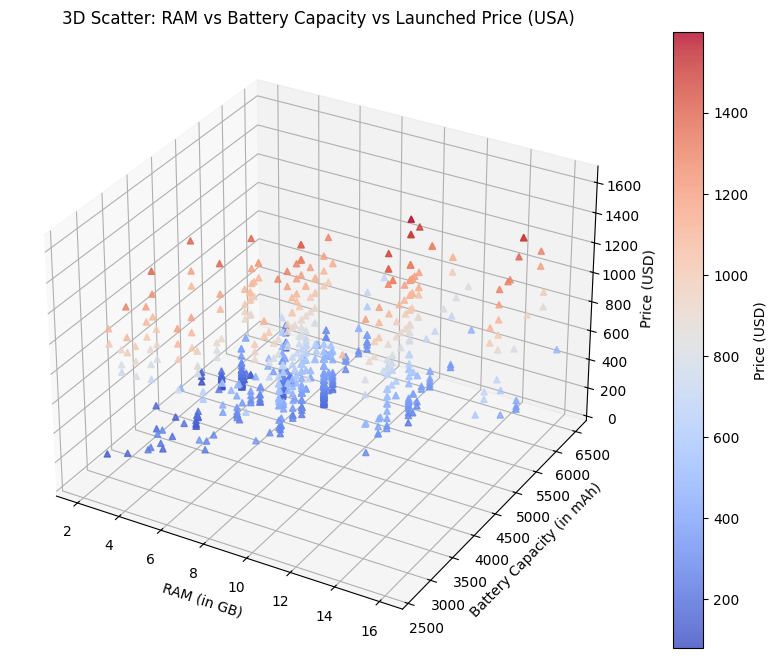

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot 1: Mobile Weight vs RAM vs Launched Price (India)
df1 = df.dropna(subset=['Mobile Weight(in g)', 'RAM(in GB)', 'Launched Price (India)(in INR)'])
fig1 = plt.figure(figsize=(12,8))
ax1 = fig1.add_subplot(111, projection='3d')
x1 = df1['Mobile Weight(in g)']
y1 = df1['RAM(in GB)']
z1 = df1['Launched Price (India)(in INR)']
sc1 = ax1.scatter(x1, y1, z1, c=z1, cmap='viridis', marker='o', alpha=0.8)
ax1.set_xlabel('Mobile Weight (in g)')
ax1.set_ylabel('RAM (in GB)')
ax1.set_zlabel('Price (INR)')
plt.title("3D Scatter: Mobile Weight vs RAM vs Launched Price (India)")
plt.colorbar(sc1, ax=ax1, label='Price (INR)')
plt.show()

# 3D Scatter Plot 2: RAM vs Battery Capacity vs Launched Price (USA)
df2 = df.dropna(subset=['RAM(in GB)', 'Battery Capacity(in mAh)', 'Launched Price (USA)(in USD)'])
fig2 = plt.figure(figsize=(12,8))
ax2 = fig2.add_subplot(111, projection='3d')
x2 = df2['RAM(in GB)']
y2 = df2['Battery Capacity(in mAh)']
z2 = df2['Launched Price (USA)(in USD)']
sc2 = ax2.scatter(x2, y2, z2, c=z2, cmap='coolwarm', marker='^', alpha=0.8)
ax2.set_xlabel('RAM (in GB)')
ax2.set_ylabel('Battery Capacity (in mAh)')
ax2.set_zlabel('Price (USD)')
plt.title("3D Scatter: RAM vs Battery Capacity vs Launched Price (USA)")
plt.colorbar(sc2, ax=ax2, label='Price (USD)')
plt.show()